<a href="https://colab.research.google.com/github/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/curso_exposoma_modulo_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al concepto del Exposoma y sus metodologías. Sesión 4 - "Estrategias para el análisis de datos de Exposoma."**  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/isglobal.png?raw=1" alt="ISGlobal logo" width="300"/>  

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposoma.png?raw=1" alt="ISGlobal logo" width="500"/>

**Alan Domínguez**, Investigador Predoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  
**Augusto Anguita-Ruiz**, Investigador Postdoctoral del Instituto de Salud Global de Barcelona - ISGlobal.  

El exposoma, descrito como "la totalidad de las exposiciones ambientales humanas desde la concepción en adelante", reconoce que los individuos estamos expuestos simultaneamente a multiples factores ambientales diferentes adoptando un efoque holístico para el descubrimento de factores etiológicos de la enfermedad. La ventaja prinicipal del enfoque del exposoma sobre otros más tradicionales "una exposición, una enfermedad o desenlace de salud" es que proporciona un framework para el estudio de múltiples riesgos ambientales (urbanos, químicos, estilo de vida, sociales, etc...) y sus efectos combinados.

El **objetivo** de esta sesión es ofrecer una **introducción a los distintos abordajes estadísticos** necesarios para responder a las principales cuestiones de **investigación en exposoma**, por lo que esta sesión se :

**1.- Análisis descriptivo:**  En una primera parte de la sesión se trabajará sobre el concepto de análisis descriptivo en exposómica, mediante el cual se extraen las primeras conclusiones sobre los datos. Entre otros objetivos, el análisis descriptivo persigue identificar posibles valores anómalos, factores de confusión o variables que requieran de transformaciones previas al análisis. A su vez, el análisis descriptivo permite comparar preliminarmente los grupos experimentales objeto de estudio, estudiar los patrones de correlación existentes entre factores de exposición, e identificar fenómenos de agrupación en los datos (tanto a nivel de individuos como de características). Todos ellos, pasos imprescindibles para elegir el abordaje estadístico posterior más adecuado.

Alguno de los contenidos que revisaremos en esta sección:
* **Visualización de la distribución y concentración de variables del exposoma.**
* **Correlación entre exposiciones**
* **Análsis de Componentes Principales (PCA) aplicado a variables del exposoma.**

**2.- Análisis de asociación:** El análisis de asociación persigue la identificación de los posibles factores de exposición ambiental asociados con distintos parámetros de salud. En este bloque de la sesión se presentarán por lo tanto distintos abordajes analíticos holísticos centrados en el estudio de los efectos de múltiples factores de exposición y sus mezclas sobre la salud. Esto incluye principalmente modelos como el ExWAS (Exposome-Wide Association Analysis), u otros para el estudio de interacciones, o fenómenos de no linealidad (e.g., Bayesian Kernel Machine Regression). También se presentará una introducción a los métodos de clustering o mezclas de exposición (e.g., Weighted Quantile Sum Regression). Durante su estudio, se introducirán conceptos de gran importancia en el análisis del exposoma como son la selección de características o la corrección de testeo múltiple.

Alguno de los contenidos que revisaremos en esta sección:
* **Exposure Wide Association Analysis (ExWas)**
* **Métodos para la selección de variables (Stepwise, Elastic net, DSA)**
* **Weighted quantile sum regression**
* **Clustering**
* **Bayesian Kernel Machine Regression**


# **Recordatorio: Introducción a NoteBook**

Dentro de este cuaderno (*NoteBook*), se le guiará paso a paso desde la carga de un conjunto de datos hasta el análisis descriptivo de su contenido.

El cuaderno de *Jupyter* (Python) es un enfoque que combina bloques de texto (como éste) junto con bloques o celdas de código. La gran ventaja de este tipo de celdas, es su interactividad, ya que pueden ser ejecutadas para comprobar los resultados directamente sobre las mismas. *Muy importante*: **el orden las instrucciones es fundamental**, por lo que cada celda de este cuaderno debe ser ejecutada secuencialmente. En caso de omitir alguna, puede que el programa lance un error, así que se deberá comenzar desde el principio en caso de duda.

Antes de nada:

Es **muy muy importante** que al comienzo se seleccione **"*Abrir en modo de ensayo*" (draft mode)**, arriba a la izquierda. En caso contrario, no permitirá ejecutar ningún bloque de código, por cuestiones de seguridad. Cuando se ejecute el primero de los bloques, aparecerá el siguiente mensaje: "*Advertencia: Este cuaderno no lo ha creado Google.*". No se preocupe, deberá confiar en el contenido del cuaderno (*NoteBook*) y pulsar en "Ejecutar de todos modos".

¡Ánimo!

Haga clic en el botón "play" en la parte izquierda de cada celda de código. Las líneas de código que comienzan con un hashtag (#) son comentarios y no afectan a la ejecución del programa.

También puede pinchar sobre cada celda y hacer "*ctrl+enter*" (*cmd+enter* en Mac).

Cada vez que ejecute un bloque, verá la salida justo debajo del mismo. La información suele ser siempre la relativa a la última instrucción, junto con todos los `print()` (orden para imprimir) que haya en el código.

## **ÍNDICE**
1. [Instalación del entorno R y sus bibliotecas para el análisis de exposoma](#instalacion-librerias)    
2. [Cargar los datos](#cargar-datos)
3. [Análisis descriptivo del Exposoma](#descriptivo)   
4. [Análisis de asociación del Exposoma](#asociacion)
  
8. [Bibliografía](#etiquetaG)

## **1. Instalación del entorno R y librerias para el análisis del exposoma** <a name="instalacion-librerias"></a>

A continuación, instalamos/cargamos las librerias necesarias para esta sesión. En el contexto de análisis de exposoma, las bibliotecas de R nos ofrecen una manera mucho más cómoda de procesar, manipular y analizar los datos. Algunas de estas bibliotecas: `tidyverse`, `skimr`, `rexposome`, `bkmr`,  `gWQS`.   
  
La instalación de R en nuestro entorno de Google Colab se realizará en el siguiente bloque de código. Hay que recordar que todas las instalaciones de bibliotecas que realicemos en el entorno de Google Colab solo permanecerán activas unas pocas horas, después de las cuales las bibliotecas instaladas se eliminan. Por lo tanto, será necesario que vuelvas a ejecutar los códigos de instalación de bibliotecas de esta sección cuando necesites ejecutar de nuevo notebook pasado este tiempo.

**Nota:** Recomendamos instalar las librerias **30 minutos** antes del comienzo de la sesión❗❗❗


In [1]:
# primero chequeamos la version de R que tenemos
#R.Version()

* **Instalar/cargar librerias para la sesión**

Instalaremos/cargaremos las librerias necesarias para la sesión práctica, para esto utilizaremos el paquete `pacman`, este paquete es una herramienta de administración que combina funcionalidades de las funciones `install.packages` + `library`.








In [4]:
# Tiempo estimado de ejecución: 3 segundos aprox.

install.packages("pacman") # nos permite instalar/cargar paquetes de manera simultanea

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Instalaremos `BiocManager` y `rexposome` (estos dos paquetes son fundamentales para el análsis del exposoma), utilizando el siguiente código ya que algunas veces suele tener problemas de compatibilidad con la versión de R (el proceso tarda alrededor de **20 minutos**, por lo que se recomienda instalarla durante la sesión teórica.

In [3]:
# Tiempo estimado de ejecución: 23 minutos aprox.

if (!requireNamespace("BiocManager", quietly=TRUE))
    install.packages("BiocManager")

packages = c('Biobase', 'mice', 'MultiDataSet', 'lsr', 'FactoMineR',
	'stringr', 'circlize', 'corrplot', 'ggplot2', 'reshape2', 'pryr',
	'scales', 'imputeLCMD', 'scatterplot3d', 'glmnet', 'gridExtra',
	'grid', 'Hmisc', 'gplots', 'gtools', 'S4Vectors'
)
for( pkg in packages ) {
  if( !pkg %in% rownames( installed.packages() ) ) {
    message( "Installing ", pkg )
    BiocManager::install( pkg )
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing Biobase

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion', 'Biobase'

also installing the dependency ‘BiocGenerics’


Old packages: 'bit', 'curl', 'dbplyr', 'devtools', 'evaluate', 'gargle',
  'highr', 'htmltools', 'isoband', 'knitr', 'lifecycle', 'openssl', 'ragg',
  'rlang', 'roxygen2', 'rprojroot', 'textshaping', 'utf8', 'waldo', 'whisker',
  'withr', 'xfun', 'boot'

Installing mice

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

I

In [5]:
# Tiempo estimado de ejecución: 2 minutos aprox.

# instalamos rexposome (la instalación de rexposome tarda un poco dependiendo de nuestra conexón)
install.packages("devtools")
devtools::install_github("isglobal-brge/rexposome")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xtable’, ‘sourcetools’, ‘shiny’, ‘downlit’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





utf8      (1.2.3   -> 1.2.4) [CRAN]
withr     (2.5.1   -> 2.5.2) [CRAN]
rlang     (1.1.1   -> 1.1.2) [CRAN]
lifecycle (1.0.3   -> 1.0.4) [CRAN]
rprojroot (2.0.3   -> 2.0.4) [CRAN]
waldo     (0.5.1   -> 0.5.2) [CRAN]
evaluate  (0.22    -> 0.23 ) [CRAN]
bit       (4.0.4   -> 4.0.5) [CRAN]
isoband   (0.2.6   -> 0.2.7) [CRAN]
xfun      (0.40    -> 0.41 ) [CRAN]
highr     (0.9     -> 0.10 ) [CRAN]
knitr     (1.44    -> 1.45 ) [CRAN]
htmltools (0.5.6.1 -> 0.5.7) [CRAN]


Installing 13 packages: utf8, withr, rlang, lifecycle, rprojroot, waldo, evaluate, bit, isoband, xfun, highr, knitr, htmltools

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpIlfEja/remotese41fd9721b/isglobal-brge-rexposome-0bb431c/DESCRIPTION’ ... OK
* preparing ‘rexposome’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘rexposome_1.21.1.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘rexposome/vignettes/rsconnect/documents/exposome_data_analysis.Rmd/rpubs.com/rpubs/Publish Document.dcf’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
#para aquellos que tienen una version antigua de R (en el caso de usar Rstudio desktop)
#devtools::install_github("isglobal-brge/rexposome", ref="R-3.0")

In [7]:
# Tiempo estimado de ejecución: 8 minutos aprox.

# Añadimos todas las librerias que necesitemos utilizar (si el paquete ya esta instalado, automaticamente cargara el paquete si esta en la funcion pacman::p_load())
pacman::p_load(tidyverse, corrplot, RColorBrewer, skimr, bkmr, gWQS, ggridges, rexposome,
 MASS, caret, glmnet, partDSA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


skimr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘fields’, ‘truncnorm’



bkmr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘gridSVG’, ‘webshot’, ‘globals’, ‘listenv’, ‘parallelly’, ‘rlist’, ‘plotROC’, ‘kableExtra’, ‘future’, ‘future.apply’, ‘pscl’, ‘cowplot’



gWQS installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ggridges installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’



caret installed

Installing package into ‘/usr/local/lib

In [8]:
#if (!require("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("rexposome", force = TRUE)


## **2. Cargar los datos** <a name="cargar-datos"></a>

A continuación, se muestran las **líneas de código** necesarias para **cargar** en el entorno de R el conjunto de datos de Exposoma. Para esta sesión práctica utilizaremos datos del estudio de exposoma HELIX. El estudio HELIX es un projecto colaborativo entre seis estudios longitudinales de cohortes de nacimiento basados en la población de seis paises Europeos (Francia, Grecia, Lituania, Noruega, Españana y Reino Unido).

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/HELIX.png?raw=1" alt="HELIX logo" width="500"/>

**Nota:** Los datos proporcionados en este curso introductorio fueron simulados a partir de los datos de la subcohorte HELIX. Detalles del projecto HELIX y el origen de los datos colectados pueden ser consultados en la siguiente publicación: https://bmjopen.bmj.com/content/8/9/e021311 y website: https://www.projecthelix.eu/es.

* Los **datos de exposoma (n = 1301)** que utilizaremos estan contenidos en un archivo Rdata, el archivo contiene los siguientes ficheros:

1. `phenotype` (outcomes)
2. `exposome` (exposiciones)
3. `covariates` (covariables)


La base de datos `exposome` contiene más de **200 exposiciones**.

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/exposures_helix.png?raw=1" alt="HELIX exposures" width="300"/>

La descripción de cada variable (nombre, estructura, tipo de variable, transformacion, ...) esta detallada en el [codebook](https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/data/codebook.csv).




**1.-** Cargamos los datos necesarios para la sesión

In [9]:
# Opción 1 (cargamos las bases de datos como archivos csv)
phenotype <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/phenotype.csv"),  header = TRUE) # outcomes
exposome <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.csv"), header = TRUE) # exposiciones
covariates <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/covariates.csv"), header = TRUE) # covariables
codebook <- read.csv2(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/codebook.csv")) # codebook

In [10]:
# Opción 2 (cargamos un archivo RData, este archivo contiene los 3 dataset + el codebook)
load(url("https://raw.githubusercontent.com/alldominguez/ISGlobal.sesion4.Exposoma/main/data/exposome.RData")) #con esta línea cargamos todo

In [11]:
phenotype
exposome
covariates
codebook

,ID,e3_bw,hs_asthma,hs_zbmi_who,hs_correct_raven,hs_Gen_Tot,hs_bmi_c_cat
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<fct>
1,1,4100,0,0.30,18,84.0000,2
2,2,4158,0,0.41,25,39.0000,2
3,3,4110,1,3.33,13,40.0000,4
4,4,3270,0,-0.76,28,54.5000,2
5,5,3950,0,0.98,19,18.0000,2
6,6,2900,1,-0.08,19,4.0000,2
7,7,3350,0,0.04,34,21.1875,2
8,8,3580,1,-0.10,16,8.0000,2
9,9,3000,0,-1.78,35,19.0625,2


,ID,h_abs_ratio_preg_Log,h_no2_ratio_preg_Log,h_pm10_ratio_preg_None,h_pm25_ratio_preg_None,hs_no2_dy_hs_h_Log,hs_no2_wk_hs_h_Log,hs_no2_yr_hs_h_Log,hs_pm10_dy_hs_h_None,hs_pm10_wk_hs_h_None,⋯,hs_globalexp2_None,hs_smk_parents_None,h_distinvnear1_preg_Log,h_trafload_preg_pow1over3,h_trafnear_preg_pow1over3,hs_trafload_h_pow1over3,hs_trafnear_h_pow1over3,h_bro_preg_Log,h_clf_preg_Log,h_thm_preg_Log
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.89671105,2.872304,25.94850,17.433798,2.530279,2.583284,2.612098,22.53583,20.850005,⋯,exposure,both,-5.629052,0.3458301,21.213987,135.99576,24.914911,-2.9759296,-0.5367134,0.2880726
2,2,0.89253797,2.980008,25.89774,18.470850,1.928600,2.652479,2.761064,14.07776,29.141274,⋯,no exposure,neither,-5.045588,0.3458301,22.649684,97.88442,27.905292,-2.9759296,1.0787497,3.1954784
3,3,0.77872299,3.056501,26.08735,18.711547,2.882591,2.591756,2.356163,46.85910,31.530981,⋯,no exposure,one,-4.204225,145.5727586,25.549436,127.53614,29.299706,-1.6044503,1.1887577,3.0239239
4,4,0.08905574,3.089157,14.99138,16.409771,1.390750,2.456717,2.403247,29.81744,25.232778,⋯,exposure,one,-3.088010,187.1200205,22.743850,114.86848,22.743850,2.7488186,3.6368129,3.8393351
5,5,0.60478093,3.848211,35.19730,14.889958,3.204449,3.499594,3.307663,29.81744,24.891465,⋯,no exposure,neither,-1.459250,158.4890394,29.872070,205.77478,14.131454,4.2621375,3.0278427,4.5727340
6,6,0.20045795,2.891142,19.76697,12.825988,3.537311,3.458832,3.443253,24.76304,22.893956,⋯,no exposure,neither,-2.722931,63.1132643,7.937005,150.94307,13.986892,2.7045022,3.6203667,3.8074699
7,7,0.49652571,3.373861,23.12116,19.425609,2.237178,2.044063,2.029703,24.01430,24.891465,⋯,no exposure,neither,-2.548100,30.2726349,7.937005,165.32919,15.095685,2.7089606,0.3371863,3.7164105
8,8,0.20515012,2.878540,19.68730,14.183917,3.082235,3.318016,3.367169,20.78633,23.188724,⋯,no exposure,neither,-4.383742,117.2477971,7.937005,153.93522,22.208216,2.7127035,3.5324524,3.8396766
9,9,0.15538213,3.365869,21.89084,18.900023,1.493143,1.930974,1.988530,21.19045,24.891465,⋯,no exposure,neither,-2.832079,51.7380022,8.962809,67.55812,8.962809,2.0083483,-6.9077553,1.8159404


,ID,h_cohort,e3_sex_None,e3_yearbir_None,h_mbmi_None,hs_wgtgain_None,e3_gac_None,h_age_None,h_edumc_None,h_native_None,h_parity_None,hs_child_age_None,hs_c_height_None,hs_c_weight_None
,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,1,4,male,2008,25.51020,17,41.00000,28.00000,2,2,0,6.165640,1.220,23.4
2,2,4,male,2007,26.49151,18,41.00000,22.84155,3,2,1,6.992471,1.220,27.6
3,3,4,male,2008,30.11621,11,39.00000,34.23242,3,2,1,6.110883,1.280,37.5
4,4,2,female,2005,21.04805,21,39.28571,32.72553,1,2,1,10.138261,1.345,27.7
5,5,3,male,2005,22.15102,20,43.00000,20.86516,1,2,0,9.451175,1.370,34.0
6,6,1,female,2007,24.90358,30,38.85714,27.00000,3,2,0,6.384782,1.130,21.5
7,7,2,male,2003,27.51718,20,40.00000,39.60027,1,2,2,11.343030,1.315,29.8
8,8,1,female,2008,28.14870,20,40.57143,34.00000,2,0,0,6.338125,1.225,22.5
9,9,2,female,2004,23.02895,12,40.85714,30.38741,2,2,1,10.715948,1.510,24.3


,variable_name,domain,family,subfamily,period,location,period_postnatal,description,var_type,transformation,labels,labelsshort
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
h_abs_ratio_preg_Log,h_abs_ratio_preg_Log,Outdoor exposures,Air Pollution,PMAbsorbance,Pregnancy,Home,NA,abs value (extrapolated back in time using ratio method)duringpregnancy,numeric,Natural Logarithm,PMabs,PMabs
h_no2_ratio_preg_Log,h_no2_ratio_preg_Log,Outdoor exposures,Air Pollution,NO2,Pregnancy,Home,NA,no2 value (extrapolated back in time using ratio method)during pregnancy,numeric,Natural Logarithm,NO2,NO2
h_pm10_ratio_preg_None,h_pm10_ratio_preg_None,Outdoor exposures,Air Pollution,PM10,Pregnancy,Home,NA,pm10 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM10,PM10
h_pm25_ratio_preg_None,h_pm25_ratio_preg_None,Outdoor exposures,Air Pollution,PM2.5,Pregnancy,Home,NA,pm25 value (extrapolated back in time using ratio method)duringpregnancy,numeric,None,PM2.5,PM2.5
hs_no2_dy_hs_h_Log,hs_no2_dy_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Day before examination,no2 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,Natural Logarithm,NO2(day),NO2(day)
hs_no2_wk_hs_h_Log,hs_no2_wk_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Week before examination,no2 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,Natural Logarithm,NO2(week),NO2(week)
hs_no2_yr_hs_h_Log,hs_no2_yr_hs_h_Log,Outdoor exposures,Air Pollution,NO2,Postnatal,Home,Year before examination,no2 value (extrapolated back in time using ratio method)one year before hs test at home,numeric,Natural Logarithm,NO2(year),NO2(year)
hs_pm10_dy_hs_h_None,hs_pm10_dy_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Day before examination,pm10 value (extrapolated back in time using ratio method)one day before hs test at home,numeric,None,PM10(day),PM10(day)
hs_pm10_wk_hs_h_None,hs_pm10_wk_hs_h_None,Outdoor exposures,Air Pollution,PM10,Postnatal,Home,Week before examination,pm10 value (extrapolated back in time using ratio method)one week before hs test at home,numeric,None,PM10(week),PM10(week)


**2.-** Revisamos la estructura y dimensión de los datos

In [18]:
dplyr::glimpse(phenotype) # 1301 observaciones

Rows: 1,301
Columns: 7
$ ID               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ e3_bw            <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350, 3580, 3000,…
$ hs_asthma        <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,…
$ hs_zbmi_who      <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.04, -0.10, -1…
$ hs_correct_raven <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 18, 24, 30, 3…
$ hs_Gen_Tot       <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.0000, 4.0000, …
$ hs_bmi_c_cat     <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 4, 3, 2, 2,…


In [13]:
dplyr::glimpse(exposome) # 1301 observaciones

Rows: 1,301
Columns: 223
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_h_Log           <dbl> 2.583284, 2.652479, 2.591756, 2.456717, 3…
$ hs_no2_yr_hs_h_Log           <dbl> 2.612098, 2.761064, 2.356163, 2.403247, 3…
$ hs_pm10_dy_hs_h_None         <dbl> 22.53583, 14.07776, 46.85910, 29.81744, 2…
$ hs_pm10_wk_hs_h_None         <dbl> 20.850005, 29.141274, 31.530981, 25.23277…
$ hs_pm10_yr_hs_h_None         <dbl> 31.39907, 31.25053, 27.51600, 23.96526, 2…
$ hs_pm25_dy_hs_h_None         <dbl> 16.950474, 11.155481, 28.454911, 4.624601…
$ hs_pm25_wk_hs

In [14]:
dplyr::glimpse(covariates) # 1301 observaciones

Rows: 1,301
Columns: 14
$ ID                <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ h_cohort          <fct> 4, 4, 4, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 4, 4, 4, 4…
$ e3_sex_None       <fct> male, male, male, female, male, female, male, female…
$ e3_yearbir_None   <fct> 2008, 2007, 2008, 2005, 2005, 2007, 2003, 2008, 2004…
$ h_mbmi_None       <dbl> 25.51020, 26.49151, 30.11621, 21.04805, 22.15102, 24…
$ hs_wgtgain_None   <dbl> 17, 18, 11, 21, 20, 30, 20, 20, 12, 9, 10, 18, 5, 20…
$ e3_gac_None       <dbl> 41.00000, 41.00000, 39.00000, 39.28571, 43.00000, 38…
$ h_age_None        <dbl> 28.00000, 22.84155, 34.23242, 32.72553, 20.86516, 27…
$ h_edumc_None      <fct> 2, 3, 3, 1, 1, 3, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2…
$ h_native_None     <fct> 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2…
$ h_parity_None     <fct> 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1…
$ hs_child_age_None <dbl> 6.165640, 6.992471, 6.110883, 10.138261, 9.451175, 6…
$ hs_c_height_No

In [15]:
dplyr::glimpse(codebook) # este archivo contiene el codebook con la descripción de cada variable

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


* Si cargamos los archivos csv tenemos que hacer un paso adicional

In [ ]:
#rownames(codebook) <- codebook[, 2]
#codebook <- codebook[, -1]

In [16]:
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


**3.-** Hacemos un resumen rápido de nuestros datos, para revisar si estos se cargaron correctamente.

In [19]:
skimr::skim(phenotype)

── Data Summary ────────────────────────
                           Values   
Name                       phenotype
Number of rows             1301     
Number of columns          7        
_______________________             
Column type frequency:              
  factor                   1        
  numeric                  6        
________________________            
Group variables            None     

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 hs_bmi_c_cat          0             1 FALSE          4
  top_counts                   
1 2: 904, 3: 253, 4: 131, 1: 13

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate     mean      sd      p0    p25
1 ID                       0             1  651     376.       1     326  
2 e3_bw                    0             1 3389.    510.    1100    3080  
3 hs_asthma           

ERROR: ignored

In [20]:
skimr::skim(exposome)

── Data Summary ────────────────────────
                           Values  
Name                       exposome
Number of rows             1301    
Number of columns          223     
_______________________            
Column type frequency:             
  factor                   53      
  numeric                  170     
________________________           
Group variables            None    

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable               n_missing complete_rate ordered n_unique
 1 e3_alcpreg_yn_None                  0             1 FALSE          2
 2 h_bfdur_Ter                         0             1 FALSE          3
 3 h_cereal_preg_Ter                   0             1 FALSE          3
 4 h_dairy_preg_Ter                    0             1 FALSE          3
 5 h_fastfood_preg_Ter                 0             1 FALSE          3
 6 h_fish_preg_Ter                     0             1 FALSE          3
 7 h_folic_t1

ERROR: ignored

In [21]:
skimr::skim(covariates)

── Data Summary ────────────────────────
                           Values    
Name                       covariates
Number of rows             1301      
Number of columns          14        
_______________________              
Column type frequency:               
  factor                   6         
  numeric                  8         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate ordered n_unique
1 h_cohort                0             1 FALSE          6
2 e3_sex_None             0             1 FALSE          2
3 e3_yearbir_None         0             1 FALSE          7
4 h_edumc_None            0             1 FALSE          3
5 h_native_None           0             1 FALSE          3
6 h_parity_None           0             1 FALSE          3
  top_counts                            
1 5: 272, 3: 224, 4: 207, 1: 202        
2 

ERROR: ignored

*   Vamos a utilizar la función `rexposome::loadExposome` para crear un solo dataset (`ExposomeSet`) a traves de los `data.frames` que cargamos inicialmente. Primero ordenaremos los datos en el formato adecuado para nuestro análisis.




In [22]:
levels(codebook$family)

[1] "Air Pollution"                             
 [2] "Built environment"                         
 [3] "Covariates"                                
 [4] "Indoor air"                                
 [5] "Lifestyle"                                 
 [6] "Metals"                                    
 [7] "Meteorological"                            
 [8] "Natural Spaces"                            
 [9] "Noise"                                     
[10] "Organochlorines"                           
[11] "Organophosphate pesticides"                
[12] "Per- and polyfluoroalkyl substances (PFAS)"
[13] "Phenols"                                   
[14] "Phenotype"                                 
[15] "Phthalates"                                
[16] "Polybrominated diphenyl ethers (PBDE)"     
[17] "Social and economic capital"               
[18] "Tobacco Smoke"                             
[19] "Traffic"                                   
[20] "Water DBPs"

In [ ]:
# Hacemos un subset de las variables para fines ilustrativos (puedes probar con otras familias)
#xpo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                 #codebook$family == "Metals" |
                                                 #codebook$family == "Chemicals" |
                                                 #codebook$family == "Air Pollution" |
                                                 #codebook$family == "Indoor air" |
                                                 #codebook$family == "Built environment") &
                                                 #codebook$period == "Postnatal"])
#expo.list

In [23]:
# podemos probar con otro subset
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines" |
                                                  codebook$family == "Metals" |
                                                  codebook$family == "Built environment") &
                                                  codebook$period == "Postnatal"])
expo.list

[1] "hs_accesslines300_h_dic0"   "hs_accesspoints300_h_Log"  
 [3] "hs_builtdens300_h_Sqrt"     "hs_connind300_h_Log"       
 [5] "hs_fdensity300_h_Log"       "hs_landuseshan300_h_None"  
 [7] "hs_popdens_h_Sqrt"          "hs_walkability_mean_h_None"
 [9] "hs_accesslines300_s_dic0"   "hs_accesspoints300_s_Log"  
[11] "hs_builtdens300_s_Sqrt"     "hs_connind300_s_Log"       
[13] "hs_fdensity300_s_Log"       "hs_landuseshan300_s_None"  
[15] "hs_popdens_s_Sqrt"          "hs_as_c_Log2"              
[17] "hs_cd_c_Log2"               "hs_co_c_Log2"              
[19] "hs_cs_c_Log2"               "hs_cu_c_Log2"              
[21] "hs_hg_c_Log2"               "hs_mn_c_Log2"              
[23] "hs_mo_c_Log2"               "hs_pb_c_Log2"              
[25] "hs_tl_cdich_None"           "hs_dde_cadj_Log2"          
[27] "hs_ddt_cadj_Log2"           "hs_hcb_cadj_Log2"          
[29] "hs_pcb118_cadj_Log2"        "hs_pcb138_cadj_Log2"       
[31] "hs_pcb153_cadj_Log2"        "hs_pcb170_cadj_Log2"       
[33] "hs_pcb180_cadj_Log2"        "hs_sumPCBs5_cadj_Log2"

In [24]:
# podemos excluir algunas variables de exposición en las que no tenemos interes
expo.list <- expo.list[-which(expo.list == "hs_tl_cdich_None")]
expo.list <- expo.list[-which(expo.list == "hs_sumPCBs5_cadj_Log2")]

In [25]:
# seleccionamos columnas(variables) específicas provenientes de las familias que seleccionamos en el paso anterior y añadimos la variable ID
expo2 <- exposome[ ,c("ID", expo.list)]

In [26]:
# escalamos las variables continuas utilizando
index.cont <- c(3:9,11:ncol(expo2))
for (i in index.cont) {
  expo2[,i] <- expo2[,i]/IQR(expo2[,i],na.rm=T)
}

In [27]:
# revisamos las variables seleccionadas
dplyr::glimpse(expo2)

Rows: 1,301
Columns: 33
$ ID                         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, …
$ hs_accesslines300_h_dic0   <dbl> 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_h_Log   <dbl> 1.0410206, 1.7236128, 0.3585836, 2.8483688,…
$ hs_builtdens300_h_Sqrt     <dbl> 2.5614489, 2.4102779, 2.3607646, 3.0238301,…
$ hs_connind300_h_Log        <dbl> 4.761417, 3.915685, 3.002645, 5.709277, 5.0…
$ hs_fdensity300_h_Log       <dbl> 4.935381, 4.935381, 4.935381, 6.721231, 5.2…
$ hs_landuseshan300_h_None   <dbl> 1.9739687, 1.7899665, 2.6763931, 2.5376134,…
$ hs_popdens_h_Sqrt          <dbl> 1.54657294, 0.18646883, 0.18646883, 1.21078…
$ hs_walkability_mean_h_None <dbl> 3.75, 2.00, 2.50, 5.25, 3.00, 3.75, 3.00, 3…
$ hs_accesslines300_s_dic0   <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0…
$ hs_accesspoints300_s_Log   <dbl> 0.3585836, 1.3583974, 1.3583974, 2.0410206,…
$ hs_builtdens300_s_Sqrt     <dbl> 2.3222513, 2.3141441, 2.2101754, 2.4506088,…
$ hs_connind300_

In [28]:
# listado de variables de exposición
codebook[expo.list,]$labels

[1] Access_ lines_home     Access_stops_home      Building_home         
 [4] Connectivity           Facility_dens          Land use              
 [7] Population             Walkability            Access_ lines_school  
[10] Access_stops_school    Building_school_school Connectivity_school   
[13] Facility_dens_school   Land use_school        Population_school     
[16] As                     Cd                     Co                    
[19] Cs                     Cu                     Hg                    
[22] Mn                     Mo                     Pb                    
[25] DDE                    DDT                    HCB                   
[28] PCB 118                PCB 138                PCB 153               
[31] PCB 170                PCB 180               
178 Levels: Access_ lines Access_ lines_home ... Yogurt

* Combinamos datos de los ficheros `phenotype` y `covariates`

In [29]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # seleccionamos la 4 columna del dataframe phenotype y la llamamos hs_zbmi_who
             covariates[ ,2:13])  # seleccionamos de las columnas 2 a la 13 del dataframe covariates

# luego combinamos
data <- data.frame(expo2, dat)

In [30]:
# revisamos la base de datos generadas
dplyr::glimpse(codebook)

Rows: 241
Columns: 12
$ variable_name    <fct> h_abs_ratio_preg_Log, h_no2_ratio_preg_Log, h_pm10_ra…
$ domain           <fct> Outdoor exposures, Outdoor exposures, Outdoor exposur…
$ family           <fct> Air Pollution, Air Pollution, Air Pollution, Air Poll…
$ subfamily        <fct> PMAbsorbance, NO2, PM10, PM2.5, NO2, NO2, NO2, PM10, …
$ period           <fct> Pregnancy, Pregnancy, Pregnancy, Pregnancy, Postnatal…
$ location         <fct> Home, Home, Home, Home, Home, Home, Home, Home, Home,…
$ period_postnatal <fct> NA, NA, NA, NA, Day before examination, Week before e…
$ description      <fct> "abs value (extrapolated back in time using ratio met…
$ var_type         <fct> numeric, numeric, numeric, numeric, numeric, numeric,…
$ transformation   <fct> Natural Logarithm, Natural Logarithm, None, None, Nat…
$ labels           <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…
$ labelsshort      <fct> PMabs, NO2, PM10, PM2.5, NO2(day), NO2(week), NO2(yea…


In [31]:
str(data)

'data.frame':	1301 obs. of  46 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hs_accesslines300_h_dic0  : num  0 0 0 1 1 0 0 0 0 0 ...
 $ hs_accesspoints300_h_Log  : num  1.041 1.724 0.359 2.848 2.25 ...
 $ hs_builtdens300_h_Sqrt    : num  2.56 2.41 2.36 3.02 1.32 ...
 $ hs_connind300_h_Log       : num  4.76 3.92 3 5.71 5.03 ...
 $ hs_fdensity300_h_Log      : num  4.94 4.94 4.94 6.72 5.27 ...
 $ hs_landuseshan300_h_None  : num  1.97 1.79 2.68 2.54 2.85 ...
 $ hs_popdens_h_Sqrt         : num  1.547 0.186 0.186 1.211 0.083 ...
 $ hs_walkability_mean_h_None: num  3.75 2 2.5 5.25 3 3.75 3 3.25 2.75 5.25 ...
 $ hs_accesslines300_s_dic0  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ hs_accesspoints300_s_Log  : num  0.359 1.358 1.358 2.041 1.358 ...
 $ hs_builtdens300_s_Sqrt    : num  2.322 2.314 2.21 2.451 0.373 ...
 $ hs_connind300_s_Log       : num  2.83 4.15 4.76 6.76 5.66 ...
 $ hs_fdensity300_s_Log      : num  4.46 4.46 4.46 5.36 4.76 ...
 $ hs_landuseshan300_s_None  : n

Ahora crearemos nuestro objecto `ExposomeSet` combinando nuestros tres archivos que trabajamos en las líneas anteriores. Este dataset esta compuesto por:

* **3 familias de exposiciones** (built environment, metals, orgaanochlorines), son **32 exposiciones en total**. [variables continuas]
* **1 outcome** (z-score for BMI) [variable continua]
* **1 ventana de exposición** [periodo postnatal]



In [32]:
exp <- rexposome::loadExposome(
  exposures = expo2[expo.list],
  description = codebook[expo.list,],
  phenotype = dat,
  description.famCol = "family"
  )

In [33]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x58b6397931d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


Tambien podemos unir nuestras bases de datos usando la función `dplyr::inner_join`, este objecto llamado `exp_all` sera un `data.frame` y no un objecto `ExposomeSet` por lo que no podremos utilizar todas las funcionalidades del paquete `rexposome`

In [34]:
# con esta línea podemos unir todas las bases de datos utilizando ID como la key variable
exp_all <- phenotype %>%
           dplyr::inner_join(exposome, by = "ID") %>%
           dplyr::inner_join(covariates, by = "ID")

In [35]:
dplyr::glimpse(exp_all) # 1,301 observaciones y 242 variables

Rows: 1,301
Columns: 242
$ ID                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ e3_bw                        <int> 4100, 4158, 4110, 3270, 3950, 2900, 3350,…
$ hs_asthma                    <dbl> 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,…
$ hs_zbmi_who                  <dbl> 0.30, 0.41, 3.33, -0.76, 0.98, -0.08, 0.0…
$ hs_correct_raven             <int> 18, 25, 13, 28, 19, 19, 34, 16, 35, 32, 1…
$ hs_Gen_Tot                   <dbl> 84.0000, 39.0000, 40.0000, 54.5000, 18.00…
$ hs_bmi_c_cat                 <fct> 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2,…
$ h_abs_ratio_preg_Log         <dbl> 0.89671105, 0.89253797, 0.77872299, 0.089…
$ h_no2_ratio_preg_Log         <dbl> 2.872304, 2.980008, 3.056501, 3.089157, 3…
$ h_pm10_ratio_preg_None       <dbl> 25.94850, 25.89774, 26.08735, 14.99138, 3…
$ h_pm25_ratio_preg_None       <dbl> 17.433798, 18.470850, 18.711547, 16.40977…
$ hs_no2_dy_hs_h_Log           <dbl> 2.530279, 1.928600, 2.882591, 1.390750, 3…
$ hs_no2_wk_hs_

## **3.- Análisis descriptivo del Exposoma** <a name="descriptivo"></a>

Para el análsis descriptivo del exposoma vamos a utilizar la libreria `rexposome`. Esta libreria contiene diferentes funciones diseñadas para explorar y describir datos de exposoma (missing data, distribución, correlación). Algunas de sus funciones son: `normalityTest` ,`plotMissing`, `plotHistogram`, `plotFamily`, `correlation`, `plotCorrelation`.

In [36]:
# revisamos la base de datos que utilizaremos (es necesario que sea un ExposomeSet object)
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x58b6397931d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

Utilizaremos la función `rexposome::normaltyTest` para evaluar las variables del exposoma que siguen una distribución normal.

In [37]:
nm <- rexposome::normalityTest(exp)
table(nm$normality)


FALSE  TRUE 
   29     1 

In [38]:
# revisamos todas las variables que no tienen una distribución normal
nm$exposure[!nm$normality]

[1] "hs_pcb170_cadj_Log2"        "hs_hcb_cadj_Log2"          
 [3] "hs_mo_c_Log2"               "hs_pcb138_cadj_Log2"       
 [5] "hs_ddt_cadj_Log2"           "hs_fdensity300_h_Log"      
 [7] "hs_pcb180_cadj_Log2"        "hs_as_c_Log2"              
 [9] "hs_accesspoints300_h_Log"   "hs_cd_c_Log2"              
[11] "hs_fdensity300_s_Log"       "hs_accesspoints300_s_Log"  
[13] "hs_connind300_s_Log"        "hs_popdens_h_Sqrt"         
[15] "hs_co_c_Log2"               "hs_pcb118_cadj_Log2"       
[17] "hs_connind300_h_Log"        "hs_dde_cadj_Log2"          
[19] "hs_hg_c_Log2"               "hs_popdens_s_Sqrt"         
[21] "hs_builtdens300_s_Sqrt"     "hs_walkability_mean_h_None"
[23] "hs_cu_c_Log2"               "hs_landuseshan300_s_None"  
[25] "hs_pb_c_Log2"               "hs_builtdens300_h_Sqrt"    
[27] "hs_landuseshan300_h_None"   "hs_pcb153_cadj_Log2"       
[29] "hs_cs_c_Log2"

### **3.1.- Visualización de la distribución y concentración de variables del Exposoma**

In [39]:
str(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x58b6397931d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  .. .. ..@ varMetadata      :'data.frame':	13 obs. of  1 variable:
  .. .. .. ..$ labelDescription: chr [1:13] NA NA NA NA ...
  .. .. ..@ data             :'data.frame':	1301 obs. of  13 variables:
  .. .. .. ..$ hs_zbmi_who      : num [1:1301] 0.3 1.75 0.01 -0.5 -0.13 -1.25 0.87 -0.05 -0.2 1.35 ...
  .. .. .. ..$ h_cohort         : Factor w/ 6 levels "1","2","3","4",..: 4 1 3 3 3 1 5 3 5 4 ...
  .. .. .. ..$ e3_sex_None      : Factor w/ 2 levels "female","male": 2 1 1 1 1 2 2 1 2 1 ...
  .. .. .. ..$ e3_yearbir_None  : Factor w/ 7 levels "2003","2004",..: 6 6 4 3 3 6 3 3 3 6 ...
  .. .. .. ..$ h_mbmi_None      : num [1:1301] 25.5 40.3 23.3 24.1 20.3 ...
  .. .. .. ..$ hs_wgtgain_None  : num [1:1301] 17 9 9 10 8 8 12 11 17 16 ...
  .. .. .. ..$ e3_gac_None      : num [1:1301] 41 

* **Histogramas**  

Utilizando la función `plotHistogram` revisamos la distribución de las variables categoricas y continuas de nuestra base de datos. En los histogramas podemos ver una exposción de cada familia



Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the rexposome package.
  Please report the issue to the authors.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


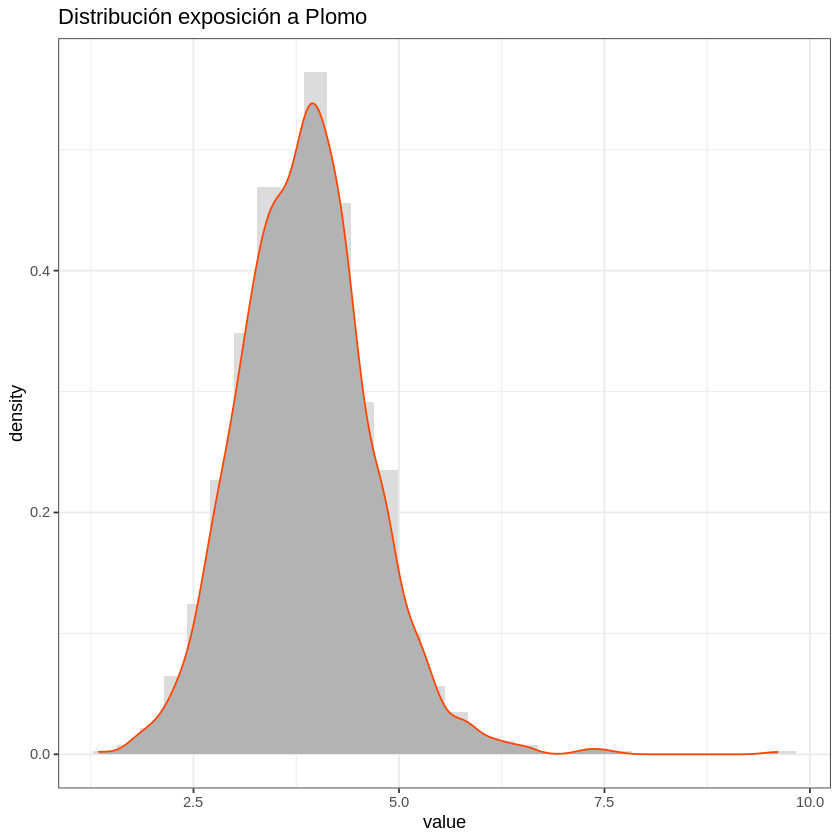

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


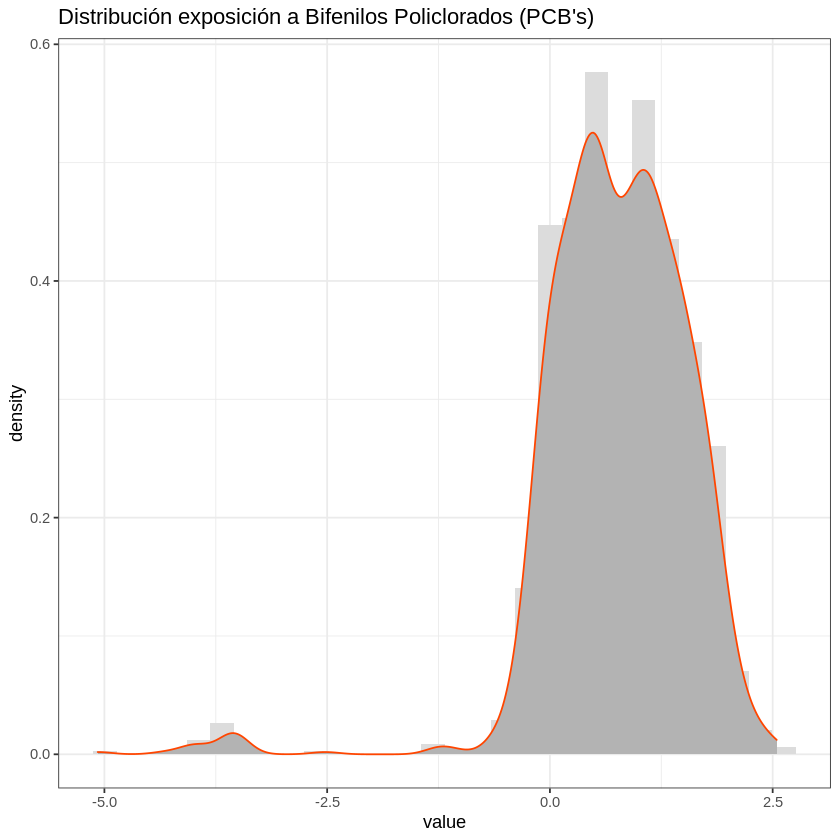

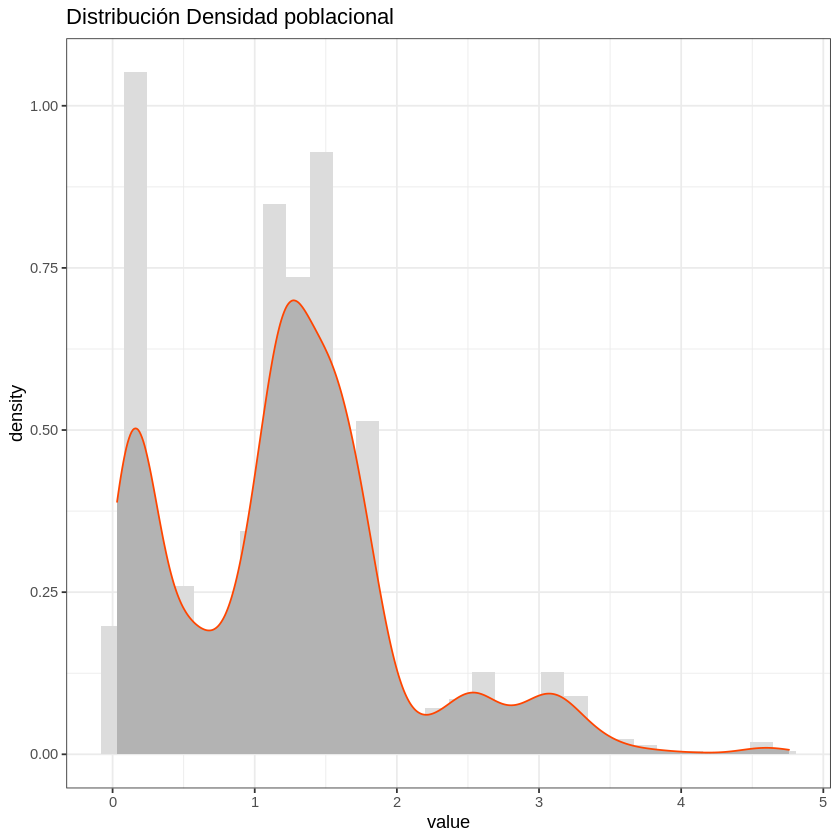

In [40]:
rexposome::plotHistogram(exp, select = "hs_pb_c_Log2") + ggtitle("Distribución exposición a Plomo")  # Histograma pb
rexposome::plotHistogram(exp, select = "hs_pcb180_cadj_Log2") + ggtitle("Distribución exposición a Bifenilos Policlorados (PCB's)") # Histograma pcb180
rexposome::plotHistogram(exp, select = "hs_popdens_h_Sqrt") + ggtitle("Distribución Densidad poblacional") # Histograma densidad poblacional

* **Boxplots**

Utilizando la función `plotFamily` podemos describir una exposición por familia y estratificar por grupo. A continuación vamos a ver algunos ejemplos (pueden probar con otras familias

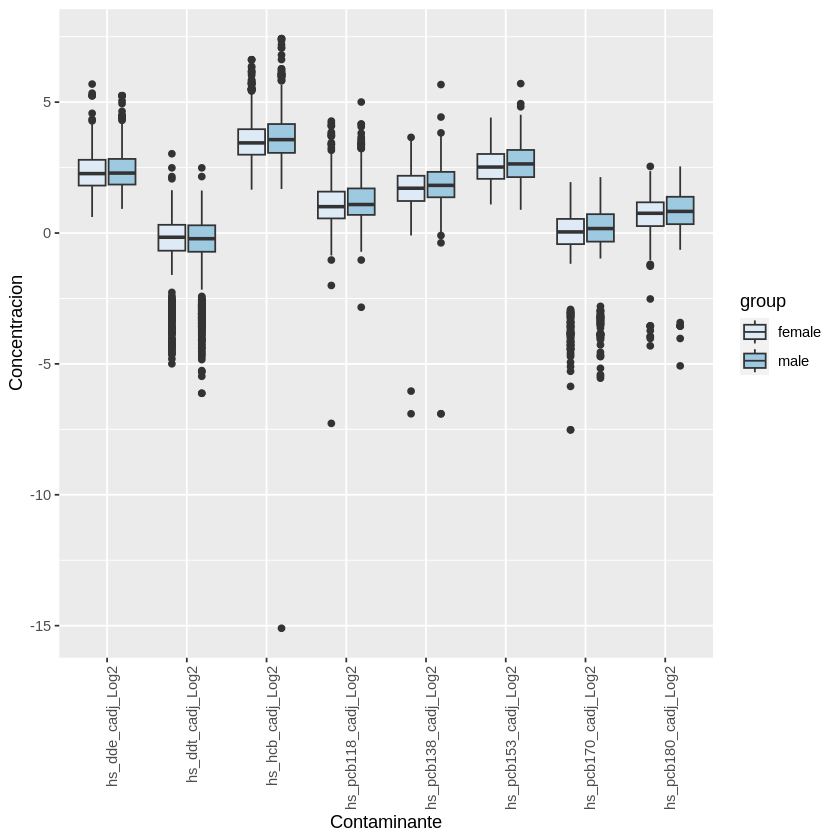

In [41]:
# Contaminantes Organoclorados estratificado por Sexo
rexposome::plotFamily(exp, family = "Organochlorines", group = "e3_sex_None") +
   xlab('Contaminante') +
   ylab('Concentracion')

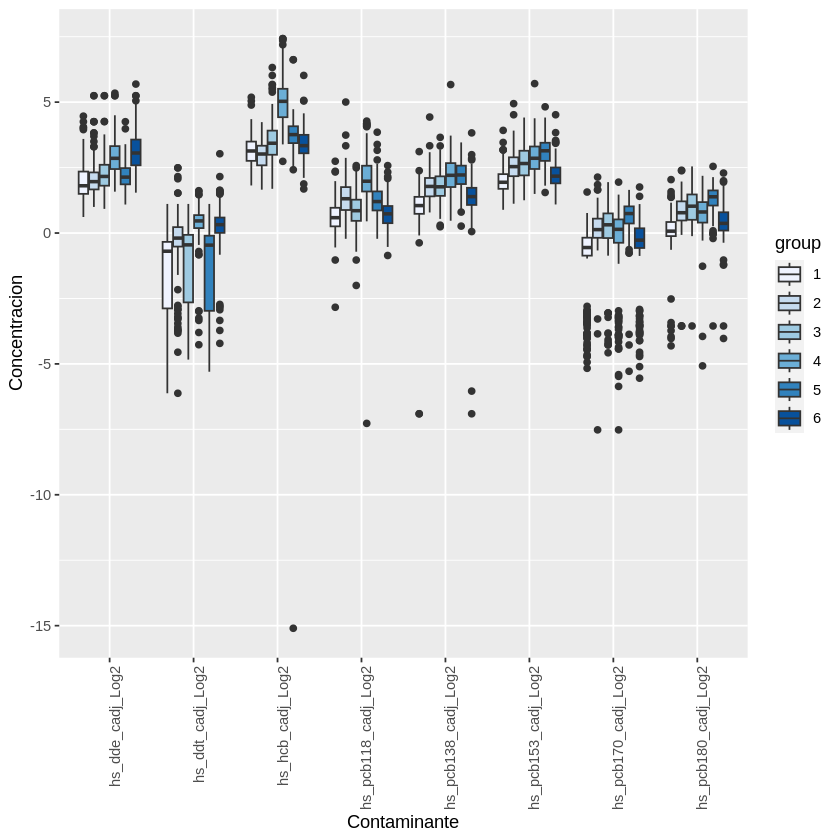

In [42]:
# Contaminantes Organoclorados** estratificado por Cohorte
rexposome::plotFamily(exp, family = "Organochlorines", group = "h_cohort") +
                      xlab('Contaminante') +
                      ylab('Concentracion')

In [ ]:
# Contaminación del aire interior estratificado por Cohorte
#rexposome::plotFamily(exp, family = "Indoor air", group = "h_cohort")

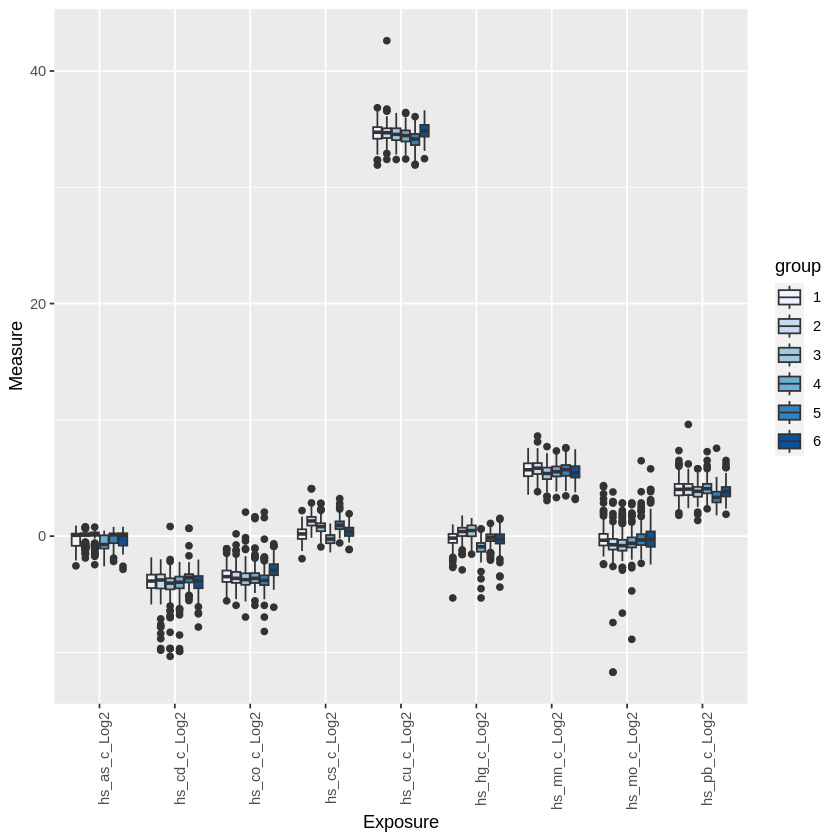

In [43]:
# Metales estratificados por Cohorte
rexposome::plotFamily(exp, family = "Metals", group = "h_cohort")

### **3.2.- Correlación entre exposiciones**

La correlación entre variables es algo importante a tener en consideración cuando queremos hacer análisis en exposoma. Para mirar la correlación intrafamiliar e interfamiliar de las diferentes exposicioens, utilizaremos la funcion `rexposome::correlation`.

In [44]:
exp_cor <- rexposome::correlation(exp, use = "pairwise.complete.obs", method.cor = "spearman") # podemos usar pearson como método de correlación

In [45]:
extract(exp_cor)[1:4, 1:4]

,hs_accesslines300_h_dic0,hs_accesslines300_s_dic0,hs_accesspoints300_h_Log,hs_accesspoints300_s_Log
hs_accesslines300_h_dic0,0.9974536,0.8710063,0.2994728,0.3298710
hs_accesslines300_s_dic0,0.8710063,0.9974857,0.2708063,0.3297577
hs_accesspoints300_h_Log,0.2994728,0.2708063,1.0000000,0.6331554
hs_accesspoints300_s_Log,0.3298710,0.3297577,0.6331554,1.0000000


Podemos visualizar la correlación de todas las exposiciones del exposoma (de nuestro set de datos) utilizando dos tipos de gráficos con la función `rexposome::plotCorrelation`. Cambiando el argumento type por `circos` o `matrix` obtenemos un gráfico diferente.

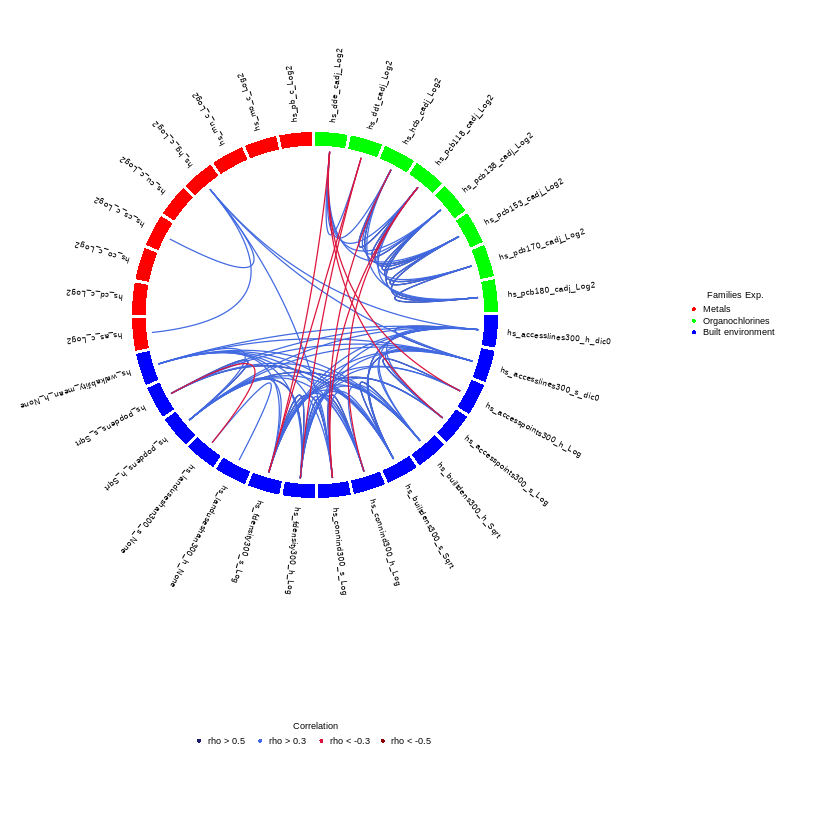

In [46]:
rexposome::plotCorrelation(exp_cor, type = "circos")

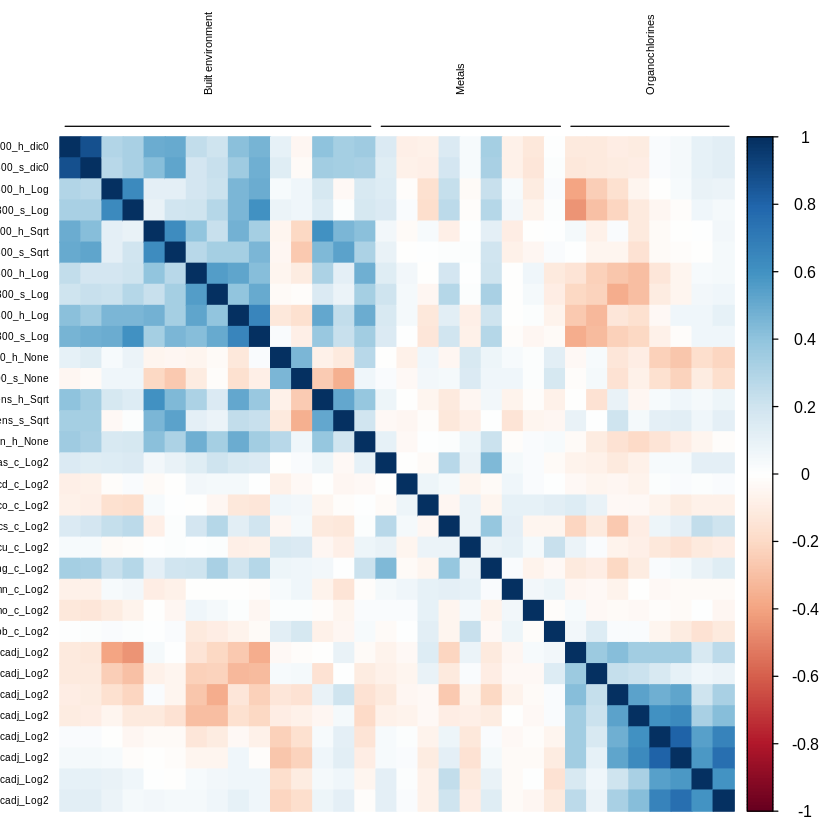

In [47]:
rexposome::plotCorrelation(exp_cor, type = "matrix",  )

### **3.3.- Análisis de Componentes Principales (PCA)**

El PCA es un algoritmo de machine learning no supervisado utilizado para análisis exploratorios y de reducción de dimensiones. Para aplicar este análisis es necesario que las exposiciones sean estandarizadas, para esto el paquete `rexposome` cuenta con la función `rexposome::standardize` que prepara nuestros datos para aplicar posteriormente el PCA utilizando la funcion `rexposome::pca`. Luego de aplicar el PCA podemos visualizar nuestro análisis utilizando la función `rexposome::plotPCA`

In [50]:
dplyr::glimpse(exp)

Formal class 'ExposomeSet' [package "rexposome"] with 7 slots
  ..@ assayData        :<environment: 0x58b6397931d0> 
  ..@ phenoData        :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ featureData      :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ experimentData   :Formal class 'MIAME' [package "Biobase"] with 13 slots
  ..@ annotation       : chr(0) 
  ..@ protocolData     :Formal class 'AnnotatedDataFrame' [package "Biobase"] with 4 slots
  ..@ .__classVersion__:Formal class 'Versions' [package "Biobase"] with 1 slot


In [51]:
# Estandraizamos las variables de exposición de nuestro objeto exp
exp_std <- rexposome::standardize(exp, method = "normal")
exp_std

Warning message in rexposome::standardize(exp, method = "normal"):
“Given categorical exposures.”
Warning message in rexposome::standardize(exp, method = "normal"):
“Categorical exposures will not be standardized.”


Object of class 'ExposomeSet' (storageMode: environment)
 . exposures description:
    . categorical:  2 
    . continuous:  30 
 . exposures transformation:
    . categorical: 0 
    . transformed: 0 
    . standardized: 30 
    . imputed: 0 
 . assayData: 32 exposures 1301 individuals
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . individuals: 1, ..., 998 
 . phenoData: 1301 individuals 13 phenotypes
    . individuals: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 
experimentData: use 'experimentData(object)'
Annotation:  

In [52]:
# Aplicamos el PCA a nuestro nuevo objeto estandarizado exp_std
exp_pca <- rexposome::pca(exp_std)
exp_pca

Object of class 'ExposomePCA' (storageMode: environment)
 . num. prin. components: 10 
 . assayData: 32 exposures 1301 samples
    . element names: exp 
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . samples: 1, ..., 998 
 . phenoData: 1301 samples 13 phenotypes
    . samples: 1, ..., 998 
    . phenotypes: hs_zbmi_who, ..., hs_child_age_None 
 . featureData: 32 exposures 17 explanations
    . exposures: hs_accesslines300_h_dic0, ..., hs_popdens_s_Sqrt 
    . descriptions: Family, ..., .imp 

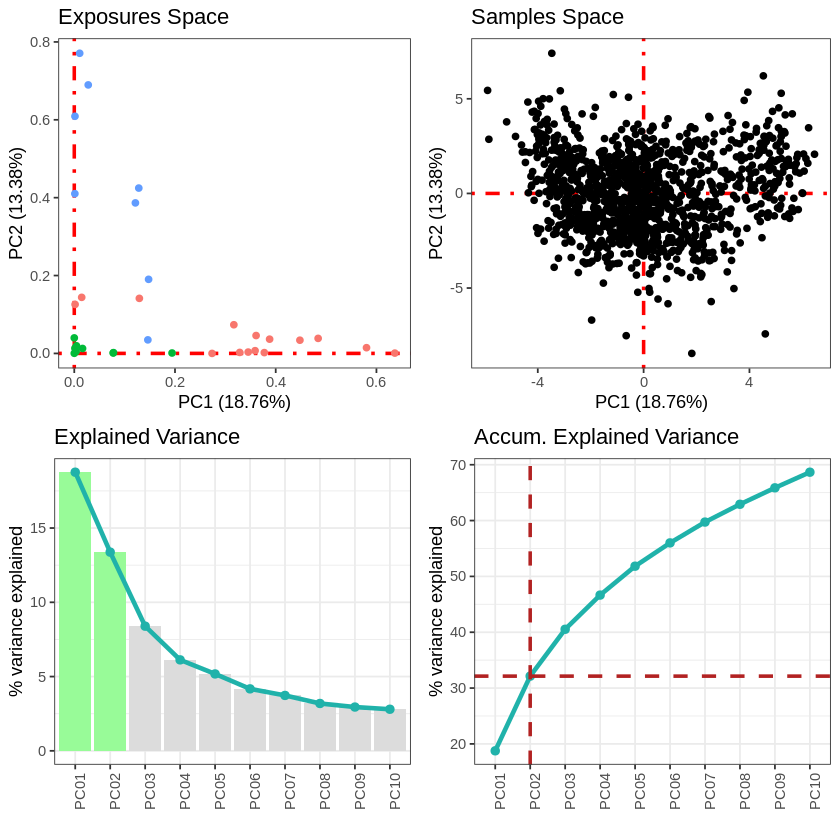

In [53]:
# Visualizamos los resultados del PCA
rexposome::plotPCA(exp_pca, set = "all")

***Interpretación PCA***

* **Exposures Space:** Este gráfico representa la variabilidad entre las diferentes exposiciones (es decir, las características o variables de entrada). Cada punto en este espacio corresponde a una exposición especifica. La posición de cada punto en las coordenadas PC1 y PC2 indica cuánta varibilidad de esa característica se captura en esas dos componentes principales.

* **Samples Space:** Este gráfico representa la variabilidad entre las diferentes muestras o sujetos. Cada punto representa una observación (individuos en nuestro ejemplo), y su posición en las coordenadas PC1 y PC2 indica cuánto de la varibilidad total de esa muestra se describe por esas dos componentes principales.

* **Explained Variance:** Este gráfico de barras muestra el porcentaje de varianza total del conjunto de datos que es explicado por cada componente principal individual. El primer componente (PC1) suele explicar la mayor parte de la variabilidad, seguido por el segundo (PC2), y así sucesivamente. La altura de cada barra indica cuánta varianza explica cada componente.

* **Accum. Explained Variance:** Este gráfico indica cuánta variabilidad total se ha capturado después de sumar cada componente principal sucesivo. Por ejemplo, la varianza explicada por PC1 + PC2 juntos, luego PC1 + PC2 + PC3, y así sucesivamente.

En **resumen** podemos concluir de nuestro análisis **PCA**:

**1.** PC1 explica el 18,76% de la varianza total, mientras que PC2 explica el 13,39%.  
**2.** Las exposiciones (caracteristicas del exposoma) se agrupan en regiones específicas en el espacio de exposiciones, lo que indica que algunas características son similares entre sí.   
**3.** Los individuos en el espacio de muestras se agrupan densamente en torno a un área central, con algunos grupos de puntos dispersos, lo que podría indicar posibles patrones dentro de los datos (clusters).  







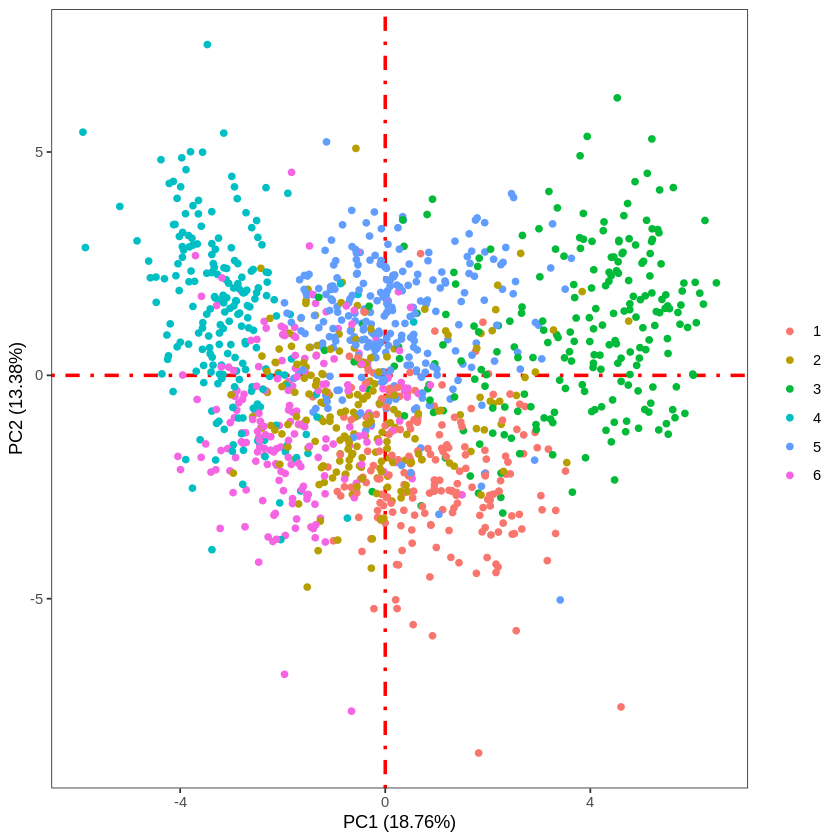

In [54]:
rexposome::plotPCA(exp_pca, set = "samples", phenotype = "h_cohort")

**Interpretación PCA - cohorte**

En el gráfico podemos ver que las observaciones de las diferentes cohortes se superponen en gran medida, pero también hay áreas en las que ciertas observaciones tienden a agruparse más densamente. A pesar de que vemos cierta clusterización o agrupación de observaciones, existe una superposición significativa entre los puntos, **lo que podría indicar que las diferencias entre cohortes no son las principales fuentes de variación en este conjunto de datos**. Este tipo de gráfico es útil para visualizar cómo se relacionan las muestras entre sí en función de su variabilidad y cómo se distribuyen en función de una categoría de interés, en este caso la variable cohorte.



## **4.- Análisis de asociación del Exposoma** <a name="asociacion"></a>
Una vez exploradas y descritas las variables del exposoma que queremos estudiar, podemos mirar la asociación entre algún desenlace de salud y las diferentes exposiciones mediante diferentes aproximaciones como las mencionadas en la parte teórica.


### **4.1.- Exposome-Wide association analysis (ExWAS)**

El método ExWAS es una aproximación que nos permite lidiar con high-dimensionality data. Este método testea la asociación de cada una de las exposiciones con el desenlace de salud de interés, ajustando por variables confusoras (pero no por co-exposiciones), adicionalmente nos permite controlar por testeos múltiples. Este método puede ser aplicado a través de la función `rexposome::exwas`.

In [56]:
exwas <- rexposome::exwas(exp, formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None, family = "gaussian")
exwas

An object of class 'ExWAS'

       ~ hs_zbmi_who h_cohort + e3_sex_None + e3_yearbir_None 

Tested exposures:  32 
Threshold for effective tests (TEF):  2.58e-03 
 . Tests < TEF: 1 
Robust standar errors: Computed

In [57]:
# Obtenemos el threshold para el número efectivo de testeo (multiple testing): corrected p-value
rexposome::tef(exwas)

[1] 0.002578272

In [58]:
rexposome::extract(exwas)

In [59]:
exwas_result <- round(as.data.frame(extract(exwas)),6)
View(exwas_result)

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


In [60]:
exwas_result[exwas_result$pvalue<tef(exwas),]

,pvalue,effect,X2.5,X97.5
,<dbl>,<dbl>,<dbl>,<dbl>
hs_pcb153_cadj_Log2,0.000000,-0.601448,-0.700145,-0.502751
hs_pcb170_cadj_Log2,0.000000,-0.267357,-0.316641,-0.218073
hs_pcb138_cadj_Log2,0.000000,-0.394363,-0.471809,-0.316917
hs_pcb180_cadj_Log2,0.000000,-0.410830,-0.492683,-0.328976
hs_hcb_cadj_Log2,0.000000,-0.266632,-0.329649,-0.203616
hs_dde_cadj_Log2,0.000000,-0.378716,-0.471500,-0.285933
hs_pcb118_cadj_Log2,0.000000,-0.244863,-0.319822,-0.169905
hs_accesslines300_s_dic0,0.000000,0.530678,0.353632,0.707725
hs_accesslines300_h_dic0,0.000000,0.514561,0.338675,0.690448


Utilizando la función `rexposome::plotExwas` podemos visualizar los resultados del exwas usando un Manhattan plot. Este tipo de gráfico es particularmente útil ya que nos permite visualizar la asociación estadistica a traves del p-valor agrupado por las diferentes familias de exposición. Es importante mencionar que el Manhattan plot solo nos enseña los p-valores, pero ninguna metrica de el efecto de las exposiones es enseñado.

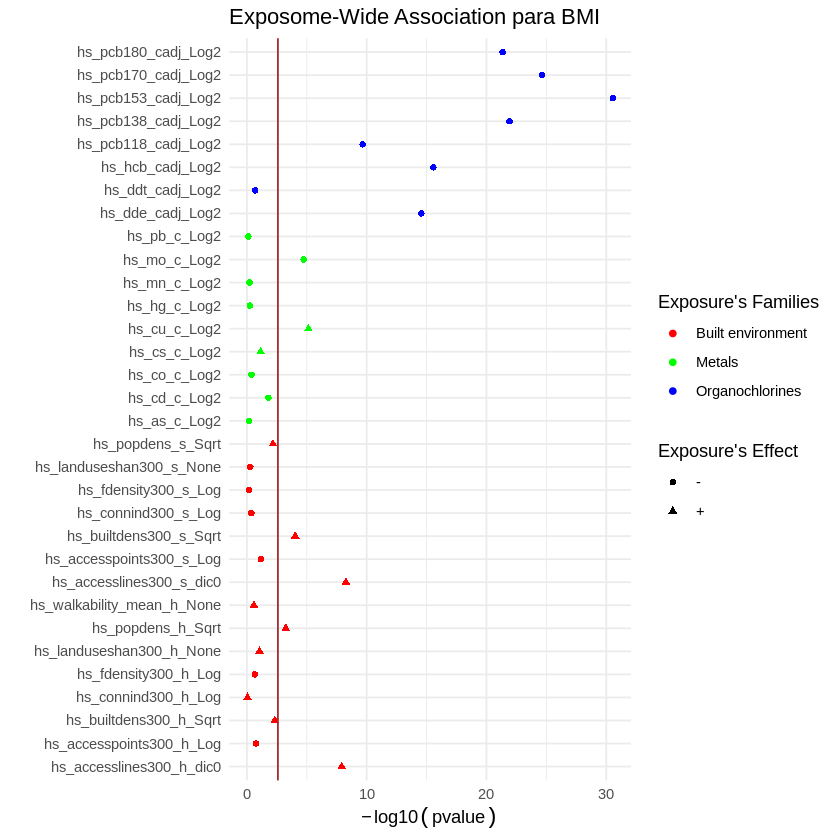

In [61]:
clr <- rainbow(length(familyNames(exp)))
names(clr) <- familyNames(exp)

rexposome::plotExwas(exwas, color = clr, show.effective = TRUE,
          exp.order=expo.list) +
  ggtitle("Exposome-Wide Association para BMI")

*   **Pregunta 1:** <font color='green'> **¿El análisis ExWas es controlado por multiple testing?** </font>




*   **Pregunta 2:** <font color='green'> **¿Si algún participante esta expuesto a PCB153, podemos decir que si también esta expuesto a PCB118 se reducirá su BMI?** </font>


Utilizando la función `rexposome::plotEffect` podemos ver el efecto estimado para un módelo determinado, en este caso el efecto de las exposiciones postnatales de las familias seleccionadas (Built environment, Metals, Organochlorines) en el BMI.

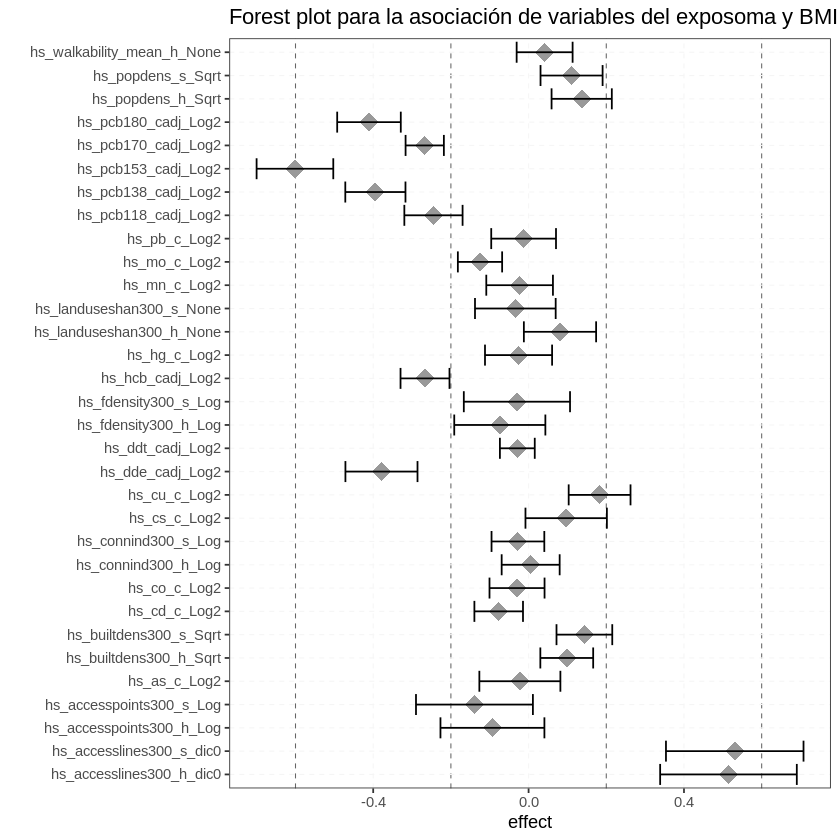

In [62]:
rexposome::plotEffect(exwas) + ggtitle("Forest plot para la asociación de variables del exposoma y BMI")

Otra forma de visualizar los resultados del ExWAS es mediante un volcano-plot, este tipo de gráfico es más ilustrativo ya que combina las tecnicas de visualización enseñadas anteriormente. Este tipo de gráfico enseña el p-valor y el tamaño del efecto de las diferentes exposiciones con el desenlace de salud estudiado (BMI). El volcano-plot puede ser generado mediante la función `rexposome::volcanoPlot`

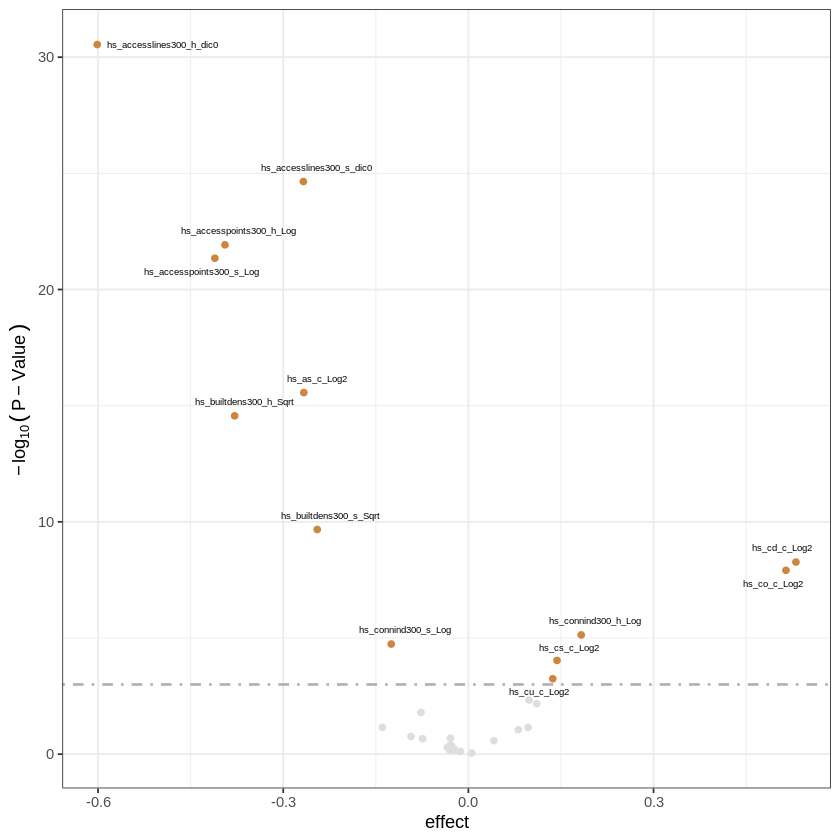

In [63]:
rexposome::plotVolcano(exwas)

### **3.2.- Métodos para selección de variables**
Las técnicas para la selección de variables generalmente son realizadas automáticamente por algoritmos (utilizadas ampliamente en problemas de alta dimensionalidad). En principio estas técnicas nos permiten discriminar aquellas variables o exposiciones que no estan asociadas con un desenlace de salud. Estos métodos de seleción de variables estan implementadas en otras librerias, algunas de ellas son: `Mass`, `Caret`, `DSA`




* **Stepwise selection:** Esta técnica de selección utiliza una secuencia de pasos para permitir que las variables predictoras entren o salgan de un modelo de regresión una por una (genera múltiples modelos). A menudo, este procedimiento converge en un subconjunto de variables. Los criterios de entrada y salida se basan comúnmente en la significancia del p-valor. La importancia de las características se clasifica según su capacidad individual para explicar la variación en el resultado.





In [64]:
set.seed(234) #definimos una semilla
full.model <- lm(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                   hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                   hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                   hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                   hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                   hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                   hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                   hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                   hs_popdens_s_Sqrt + hs_as_c_Log2 +
                   hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                   hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                   hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                   hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                   hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                   hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                   hs_pcb180_cadj_Log2,
                 data = data)

In [65]:
step.model <- stepAIC(full.model, direction = "both",
                      trace = FALSE,
                      scope = list(lower = ~ h_cohort + e3_sex_None + e3_yearbir_None))

In [66]:
# revisamos los resultados al aplicar el modelo de stepwise
summary(step.model)


Call:
lm(formula = hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None + 
    hs_fdensity300_h_Log + hs_popdens_h_Sqrt + hs_accesspoints300_s_Log + 
    hs_cs_c_Log2 + hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mo_c_Log2 + 
    hs_pb_c_Log2 + hs_dde_cadj_Log2 + hs_hcb_cadj_Log2 + hs_pcb118_cadj_Log2 + 
    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6604 -0.6715 -0.0348  0.6512  3.5459 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.63227    1.41767  -1.857 0.063576 .  
h_cohort2                 0.50608    0.29397   1.722 0.085391 .  
h_cohort3                 1.34331    0.22622   5.938 3.71e-09 ***
h_cohort4                 0.88197    0.16891   5.222 2.07e-07 ***
h_cohort5                 0.76452    0.21720   3.520 0.000447 ***
h_cohort6                 0.55264    0.16886   3.273 0.001094 ** 
e3_sex_Nonemale           0.19688    0.05866   3.356 0.000814 ***
e3_ye

* **Elastic net:** Esta técnica se basa en la combinación de la penalización de LASSO y Ridge, con el objetivo de superar alguna de sus limitaciones. Debido a que en presencia de variables correlacionadas LASSO tiende a seleccionar una variable de un grupo e ignorar el resto y Ridge selecciona algunas variables con magnitudes similares, se logra un buen compromiso al utilizar Elastic net. Los parametros de penalización se optimizan mediante el procedimiento de cross-validation (lo que puede generar problemas de inestabilidad en los resultados)


In [67]:
# Definimos las variables predictoras del modelo (basicamente todas las exposiciones y covariables)
x <- model.matrix(hs_zbmi_who ~ h_cohort + e3_sex_None + e3_yearbir_None +
                    hs_accesslines300_h_dic0 + hs_accesspoints300_h_Log +
                    hs_builtdens300_h_Sqrt + hs_connind300_h_Log +
                    hs_fdensity300_h_Log + hs_landuseshan300_h_None +
                    hs_popdens_h_Sqrt + hs_walkability_mean_h_None +
                    hs_accesslines300_s_dic0 + hs_accesspoints300_s_Log +
                    hs_builtdens300_s_Sqrt + hs_connind300_s_Log +
                    hs_fdensity300_s_Log + hs_landuseshan300_s_None +
                    hs_popdens_s_Sqrt + hs_as_c_Log2 +
                    hs_cd_c_Log2 + hs_co_c_Log2 + hs_cs_c_Log2 +
                    hs_cu_c_Log2 + hs_hg_c_Log2 + hs_mn_c_Log2 +
                    hs_mo_c_Log2 + hs_pb_c_Log2 + hs_dde_cadj_Log2 +
                    hs_ddt_cadj_Log2 + hs_hcb_cadj_Log2+
                    hs_pcb118_cadj_Log2 + hs_pcb138_cadj_Log2+
                    hs_pcb153_cadj_Log2 + hs_pcb170_cadj_Log2 +
                    hs_pcb180_cadj_Log2, data)[,-1]


In [68]:
pen.fac <- c(rep(0,12),rep(1,ncol(x)-12))

In [69]:
set.seed(123)
model <- train(x=x, y=data$hs_zbmi_who,
  method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10, penalty.factor=pen.fac
)


In [70]:
# Best tuning parameter
model$bestTune

# Coefficient of the final model. You need
# to specify the best lambda
coef(model$finalModel, model$bestTune$lambda)

,alpha,lambda
,<dbl>,<dbl>
9,0.1,0.1284352


45 x 1 sparse Matrix of class "dgCMatrix"
                                      s1
(Intercept)                -2.2629389915
h_cohort2                   0.6122160028
h_cohort3                   1.3478411924
h_cohort4                   0.9999768034
h_cohort5                   0.7939952226
h_cohort6                   0.7135643495
e3_sex_Nonemale             0.1851492993
e3_yearbir_None2004        -0.2443820238
e3_yearbir_None2005        -0.1489583779
e3_yearbir_None2006        -0.1398704150
e3_yearbir_None2007         0.2171047737
e3_yearbir_None2008         0.3210794845
e3_yearbir_None2009         0.6322938405
hs_accesslines300_h_dic0    .           
hs_accesspoints300_h_Log   -0.0039204657
hs_builtdens300_h_Sqrt      .           
hs_connind300_h_Log         .           
hs_fdensity300_h_Log       -0.0201272364
hs_landuseshan300_h_None   -0.0066952763
hs_popdens_h_Sqrt           0.0689061184
hs_walkability_mean_h_None -0.0045176735
hs_accesslines300_s_dic0    .           
hs_accesspoints

* **Deletion Substitution Addition (DSA):** Es una técnica basada en multiples iteraciones mediante el uso de cross-validation, en donde se elimina, sustituye o agrega una variable en el modelo. Al igual que la técnica anterior esta sujeta a resultados inestables.

In [71]:
# instalamos/cargamos el DSA
pacman::p_load(partDSA)

In [72]:
control <- DSA.control(vfold=1)  # definimos que no vamos a hacer cross-validation

In [73]:
# Tiempo estimado de ejecución: 20 segundos aprox.

model_dsa <- partDSA(x, data$hs_zbmi_who, control = control)

In [74]:
print(model_dsa)

partDSA object
# partitions   test risk
1              1.414760   
2              1.277574   
3              1.224445   
4              1.190492   
5              1.167892   
6              1.151205   
7              1.134648   
8              1.119117   
9              1.105395   
10             1.092893   

Outcome:
Best of 1 partitions:
   Part.1 
    0.403
Best of 2 partitions:
   Part.1    Part.2 
    1.073    0.198
Best of 3 partitions:
   Part.1    Part.2    Part.3 
    1.073    0.382    -0.179
Best of 4 partitions:
   Part.1    Part.2    Part.3    Part.4 
    1.073    0.158    -0.179    0.677
Best of 5 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5 
    0.94    0.158    -0.179    0.677    1.8
Best of 6 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5    Part.6 
    0.94    0.158    -0.179    0.87    1.8    0.288
Best of 7 partitions:
   Part.1    Part.2    Part.3    Part.4    Part.5    Part.6    Part.7 
    0.807    0.158    -0.179    0.87    1.8    

* Comparación de métodos de selección de variables

*   **Pregunta 3:** <font color='green'> **¿Cúal de los análisis es más confiable?** </font>

1. ExWas
2. Stepwise
3. Elastic net
4. DSA

*   **Pregunta 4:** <font color='green'> **¿Seis de las variables fueron seleccionadas por los cuatro métodos de selección, seleccionarias estas seis variables para tú modelo de regressión?** </font>


### **3.3.- Clustering** ###

La identificación de patrones de exposición es de particular interes en estudios de exposoma. Utilizando técnicas de clustering en estudios de exposoma intentamos identificar grupos o grupos de sujetos que comparten perfiles de exposiciones similiares y verificamos si estas exposiciones están asociadas con un desenlace de salud.


In [75]:
# Tiempo estimado de ejecución: 48 segundos aprox.

pacman::p_load(cluster, factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ggsci’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘dendextend’, ‘ggpubr’



factoextra installed



In [76]:
# Para analizar usar ténicas de cluster es necesario centrar las exposiciones por cohorte

expo3 <- expo2
for (i in 2:length(expo2)) {
  mean_y <- with(expo3, {mean_y = ave(expo2[,i],data$h_cohort,FUN=mean)} )
  expo3[,i] <- expo3[,i] - mean_y
}

Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”


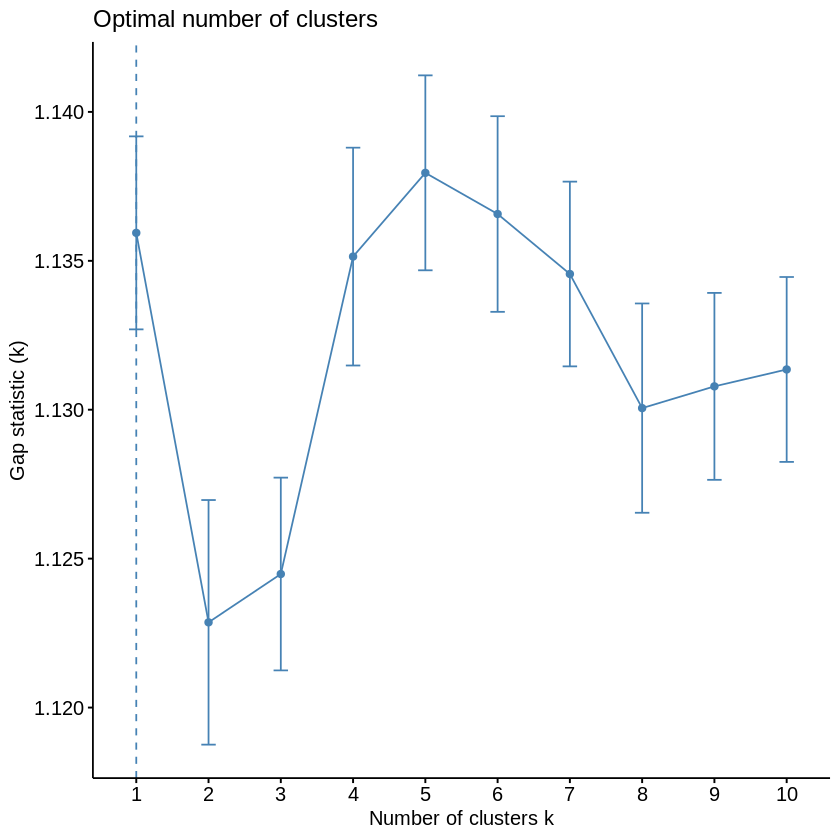

In [77]:
fviz_nbclust(expo3[,-1], kmeans, method = "gap_stat")

El número óptimo de clusters esta en el punto donde el estadístico Gap alcanza su valor máximo antes de empezar a disminuir.

*   **Pregunta 5:** <font color='green'> **¿Qué número de clusters seleccionarias basado en el Gap statistic?** </font>


In [78]:
set.seed(111)
km.res <- kmeans(expo3[,-1], centers = 5, nstart = 25)
clus.means <- aggregate(expo3[,-1], by=list(cluster=km.res$cluster), mean)

In [79]:
clus.means

cluster,hs_accesslines300_h_dic0,hs_accesspoints300_h_Log,hs_builtdens300_h_Sqrt,hs_connind300_h_Log,hs_fdensity300_h_Log,hs_landuseshan300_h_None,hs_popdens_h_Sqrt,hs_walkability_mean_h_None,hs_accesslines300_s_dic0,⋯,hs_mo_c_Log2,hs_pb_c_Log2,hs_dde_cadj_Log2,hs_ddt_cadj_Log2,hs_hcb_cadj_Log2,hs_pcb118_cadj_Log2,hs_pcb138_cadj_Log2,hs_pcb153_cadj_Log2,hs_pcb170_cadj_Log2,hs_pcb180_cadj_Log2
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.068027858,0.06802020,0.69053652,0.4911977705,0.27533155,-0.0183001617,0.52348608,0.50550886,0.051551076,⋯,0.422542712,0.09456716,0.07767365,0.5742655,0.06264613,0.06836281,0.11238437,0.07342858,0.37420082,0.14324516
2,-0.020889568,-0.02595335,-0.25926275,-0.2014307698,-0.12698967,-0.0005243344,-0.19518171,-0.21444220,-0.017076649,⋯,0.003746554,-0.03475683,-0.25616668,0.4275617,-0.28609620,-0.31110064,-0.31337829,-0.32139918,0.01065758,-0.30305792
3,-0.024699837,0.00849659,-0.16511225,-0.1126206812,-0.03953440,-0.0293309397,-0.17357374,-0.12045291,-0.024200337,⋯,-0.288081899,0.00881397,0.46828682,0.6667916,0.55480700,0.55617521,0.61278847,0.57537721,0.82875684,0.57684104
4,-0.005119143,-0.01651478,0.02372510,0.0305189412,0.04071501,0.0127606602,-0.02897997,0.14986281,0.004525342,⋯,-0.150498147,0.16155591,-0.29401009,-0.2458563,-0.35779723,-0.42873273,-0.64319126,-0.35985907,-3.28181948,-0.63367765
5,0.004265192,-0.02835575,-0.02838431,-0.0004678197,-0.01933819,0.0580466007,0.07202262,-0.04260316,0.009320802,⋯,0.020320044,-0.13601733,-0.10648825,-2.3548131,-0.12287846,-0.04340003,-0.05746925,-0.09343581,0.08636792,-0.06511702


Adicionalmente podemos ver por cuantos sujetos esta compuesto cada uno de los clusters o tambien por alguna otra variable.

In [80]:
table(km.res$cluster)


  1   2   3   4   5 
239 425 312 113 212 

In [81]:
table(km.res$cluster, data$h_cohort) # miramos el cluster y la cohorte a la que pertenecen

   
     1  2  3  4  5  6
  1 31 42 46 25 46 49
  2 41 80 68 76 88 72
  3 47 55 40 73 54 43
  4 39  3 11 28  5 27
  5 44 18 59  5 79  7

Podemos visualizar los patrones del exposoma en los diferentes clusters identificados previamente.

* **Cluster 1 (N = 239):** Viven en áreas pobladas, densas y transitables; expuestos al Mo y al DDT.

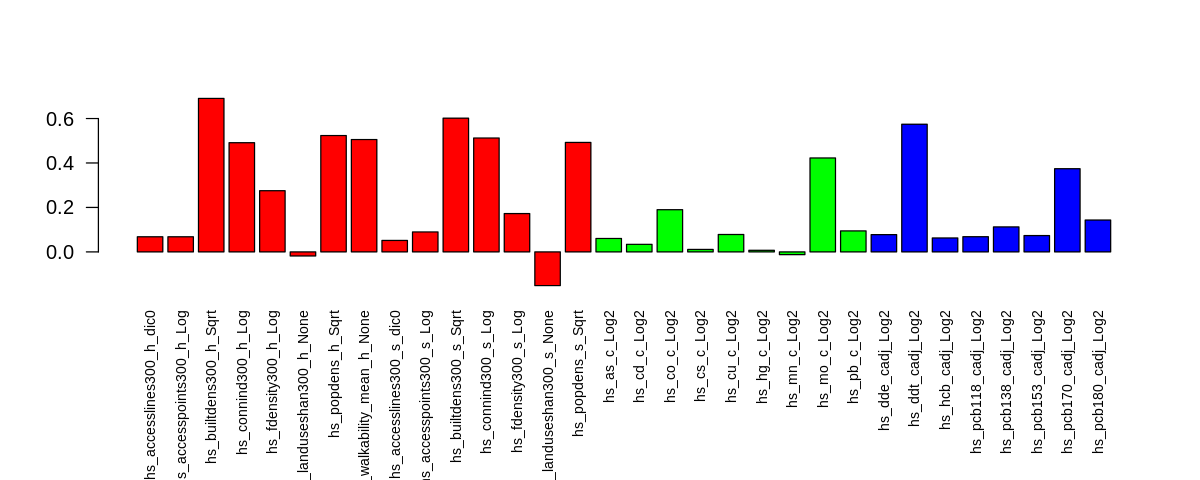

In [82]:
options(repr.plot.width=10, repr.plot.height=4) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[1,2:ncol(clus.means)]),
        col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.7,
        las=2,
        srt=90)

* **Cluster 2 (N = 425):** Alta exposición a DDT pero baja exposición a otros organoclorados; Baja densidad de población (posible medio rural).

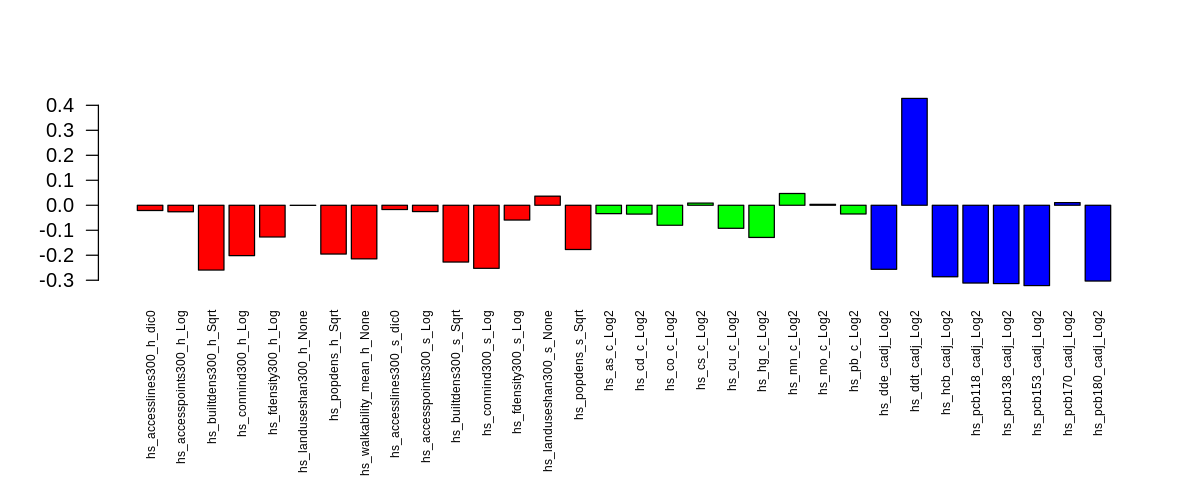

In [83]:
options(repr.plot.width=10, repr.plot.height=4) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[2,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.6,
        las=2,
        srt=90)

* **Cluster 3 (N = 113):** Exposición más baja a PCB170.

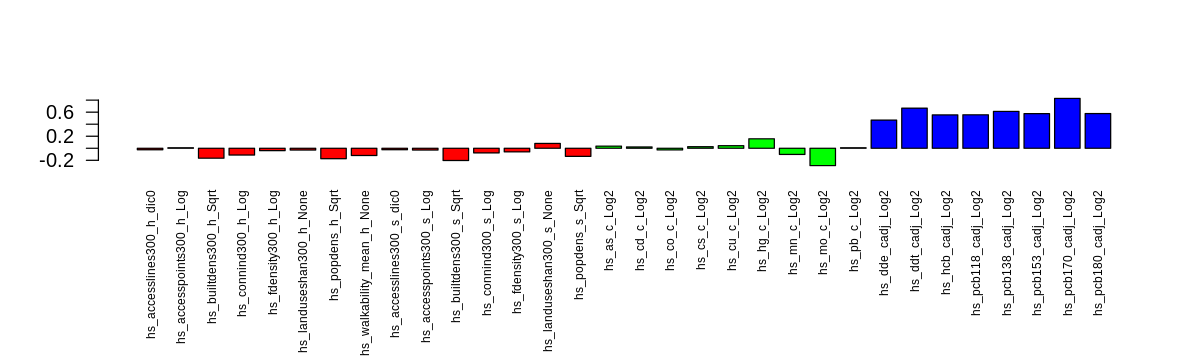

In [84]:
options(repr.plot.width=10, repr.plot.height=3) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[3,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
        names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

* **Cluster 4 (N = 312):** Altamente expuestos a todos los organoclorados

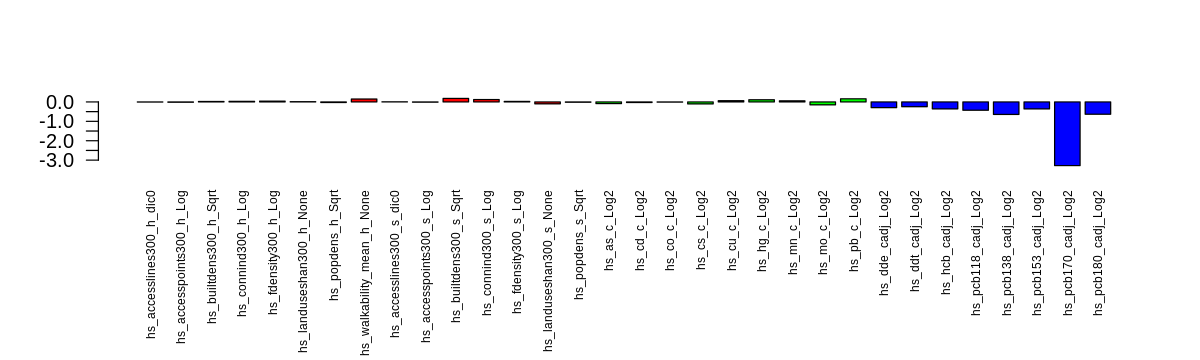

In [85]:
options(repr.plot.width=10, repr.plot.height=3) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[4,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

* **Cluster 5 (N = 212):** La menor exposición a DDT

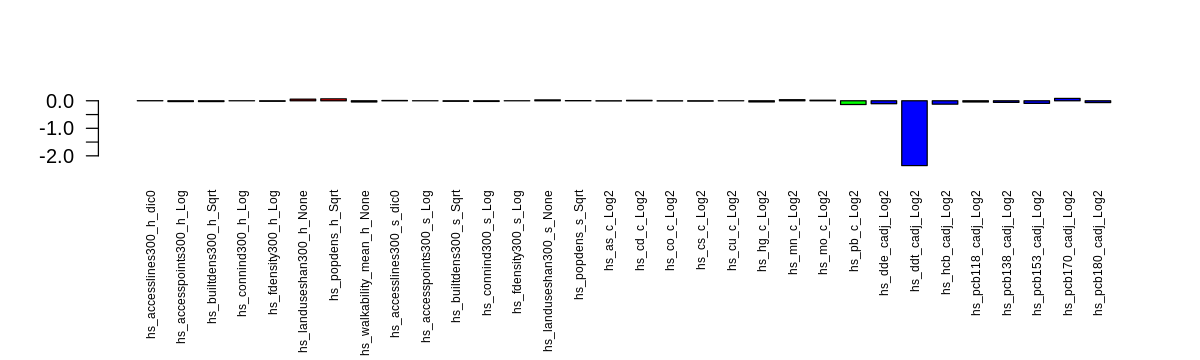

In [86]:
options(repr.plot.width=10, repr.plot.height=3) # definimos el tamaño del gráfico en colab
par(mar = c(8, 4, 4, 2) + 0.1)  # c(bottom, left, top, right) ajustamos los margenes
barplot(as.numeric(clus.means[5,2:ncol(clus.means)]), col=c(rep("red",15),rep("green",9),rep("blue",8)),
names.arg=names(clus.means)[-1],
        cex.names=.6, las=2, srt=90)

Finalmente podemos mirar la asociación de cada uno de los cluster con el desenlace de interes de salud ajustando por algunas covariales de interes.

In [87]:
mod_cluster <- lm(hs_zbmi_who ~ as.factor(km.res$cluster) + h_cohort + e3_sex_None + e3_yearbir_None, data = data) # ajustamos por cohorte, sexo y año de nacimiento
summary(mod_cluster)


Call:
lm(formula = hs_zbmi_who ~ as.factor(km.res$cluster) + h_cohort + 
    e3_sex_None + e3_yearbir_None, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7247 -0.7393 -0.0751  0.7175  3.8131 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.31055    0.34124  -0.910  0.36296    
as.factor(km.res$cluster)2  0.44636    0.09062   4.926 9.51e-07 ***
as.factor(km.res$cluster)3 -0.19275    0.09686  -1.990  0.04681 *  
as.factor(km.res$cluster)4  0.90059    0.13091   6.879 9.37e-12 ***
as.factor(km.res$cluster)5  0.26706    0.10806   2.471  0.01359 *  
h_cohort2                   0.38921    0.29804   1.306  0.19182    
h_cohort3                   0.95897    0.23162   4.140 3.69e-05 ***
h_cohort4                   0.35031    0.11296   3.101  0.00197 ** 
h_cohort5                   0.24656    0.21464   1.149  0.25090    
h_cohort6                   0.50678    0.11340   4.469 8.56e-06 ***
e3_sex_Nonemale      

In [88]:
# Tiempo estimado de ejecución: 60 segundos aprox.

pacman::p_load(dotwhisker)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’, ‘prediction’, ‘parameters’, ‘margins’, ‘ggstance’



dotwhisker installed



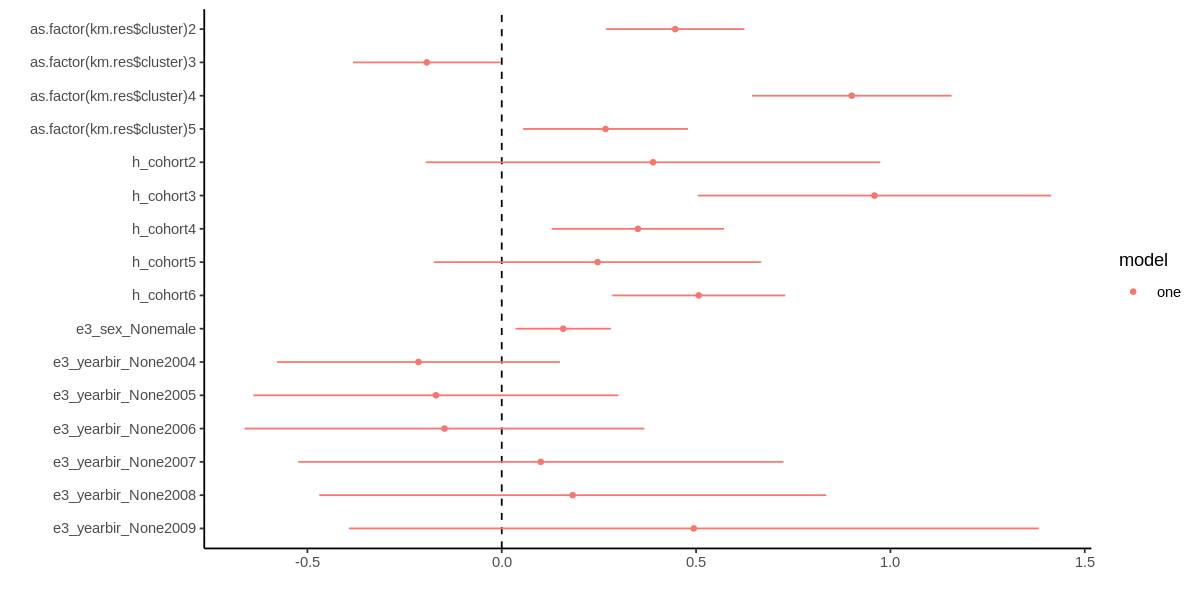

In [89]:
options(repr.plot.width=10, repr.plot.height=5) # definimos el tamaño del gráfico en collab
# envolvemos nuestra función para quitar los warnings en colab
suppressWarnings(dotwhisker::dwplot(mod_cluster, vline = geom_vline(
           xintercept = 0,
           colour = "black",
           linetype = 2)) + theme_classic())

En los resultados de la regresión podemos ver que pertenecer al **cluster 2**, **cluster3** y **cluster 4** esta asociado con un incremento en BMI, esto va a depender al cluster que seleccionemos cómo referencia.   

### **3.3.- Análisis de Mezclas**

La idea principal en análisis de mezcla o mixtures, es que niveles bajos de exposición a un determinado contaminante pueden no producir efectos en salud (o efectos demasiado pequeños para ser detectados), pero la exposición combinada a múltiples contaminantes puede generar un efecto.

Los enfoques comúnmente utilizados en epidemiologia ambiental fallan en capturar la complejidad al evaluar el efecto combinado de múltiples exposiciones debido a algunas limitaciones:

* No evalúan el efecto conjunto de múltiples exposiciones.
* No consideran la interacción entre diferentes exposiciones.
* Se enfrentan a una alta correlación entre exposiciones.

Por lo tanto se necesitan métodos más sofisticados para investigar los efectos en salud de mezclas o múltiples exposiciones. En los últimos años diversos métodos han sido propuestos para estimar los efectos independientes y conjuntos de múltiples exposiciones.

La **selección** del **método correcto** en **análisis de mezclas** debe estar guiado por la **pregunta de investigación** que queremos responder.

<img src="https://github.com/alldominguez/ISGlobal.sesion4.Exposoma/blob/main/figures/PRIME.png?raw=1" alt="ISGlobal logo" width="500"/>  


En esta sección revisaremos dos métodos para el análisis de mezclas.

**1. Weighted Quantile Sum Regression (WQS)**  
**2. Bayesian Kernel Machine Regression (BKMR)**   

**Nota:** Los análisis de mezclas consumen mucho tiempo. Es por esto, que en esta sección se enseñaran el código necesario para realizar los análsis y la interpretación de los resultados, sin correr las celdas.  



Con la siguiente línea instalamos los paquetes necesarios para realizar el análisis de mezcla.

In [98]:
# Instalamos/cargamos los paquetes necesarios para realizar el análisis
pacman::p_load(gWQS, bkmr)

Para **facilitar la interpretación** de los resultados utilizaremos solo la familia de organoclorados para el análisis de mezcla.

In [99]:
# Hacemos un subset de la expolist utilizando solo los compuestos organoclorados
expo.list <- as.character(codebook$variable_name[(codebook$family == "Organochlorines") &
                                                  codebook$period == "Postnatal"])
expo.list

[1] "hs_dde_cadj_Log2"      "hs_ddt_cadj_Log2"      "hs_hcb_cadj_Log2"     
[4] "hs_pcb118_cadj_Log2"   "hs_pcb138_cadj_Log2"   "hs_pcb153_cadj_Log2"  
[7] "hs_pcb170_cadj_Log2"   "hs_pcb180_cadj_Log2"   "hs_sumPCBs5_cadj_Log2"

In [100]:
dat <- cbind(hs_zbmi_who = phenotype[ ,4],  # seleccionamos la 4 columna del dataframe phenotype y la llamamos hs_zbmi_who
             covariates[ ,2:13])  # seleccionamos de las columnas 2 a la 13 del dataframe covariates

# luego combinamos
data <- data.frame(expo2, dat)

* **Weighted Quantile Sum Regression (WQS)**

Es una método que opera en un marco de aprendizaje supervisado,  creando una puntuación única (la suma cuantil ponderada) que resume la exposición general a la mezcla e incluyendo esta puntuación en un modelo de regresión. Tiene como objetivo evaluar el efecto general de la mezcla sobre el resultado de interés. La puntuación se calcula como una suma ponderada (de modo que las exposiciones con efectos más débiles en el resultado tengan menor peso en el índice) de todas las exposiciones categorizadas en cuartiles, o más grupos, de modo que los valores extremos tengan menos impacto en la estimación del peso.

In [101]:
set.seed(123)
mod_wqs <- gwqs(hs_zbmi_who ~ wqs + h_cohort + e3_sex_None + e3_yearbir_None, mix_name = expo.list, data = data,
                q = 10, validation = 0.6, b = 100, b1_pos = FALSE,
                b1_constr = FALSE, family = "gaussian", seed = 2016)

ERROR: ignored

In [95]:
options(repr.plot.width=10, repr.plot.height=5) # definimos el tamaño del gráfico en colab
gwqs_barplot(mod_wqs)

ERROR: ignored

In [102]:
summary(mod_wqs)

ERROR: ignored

`geom_smooth()` using formula = 'y ~ x'


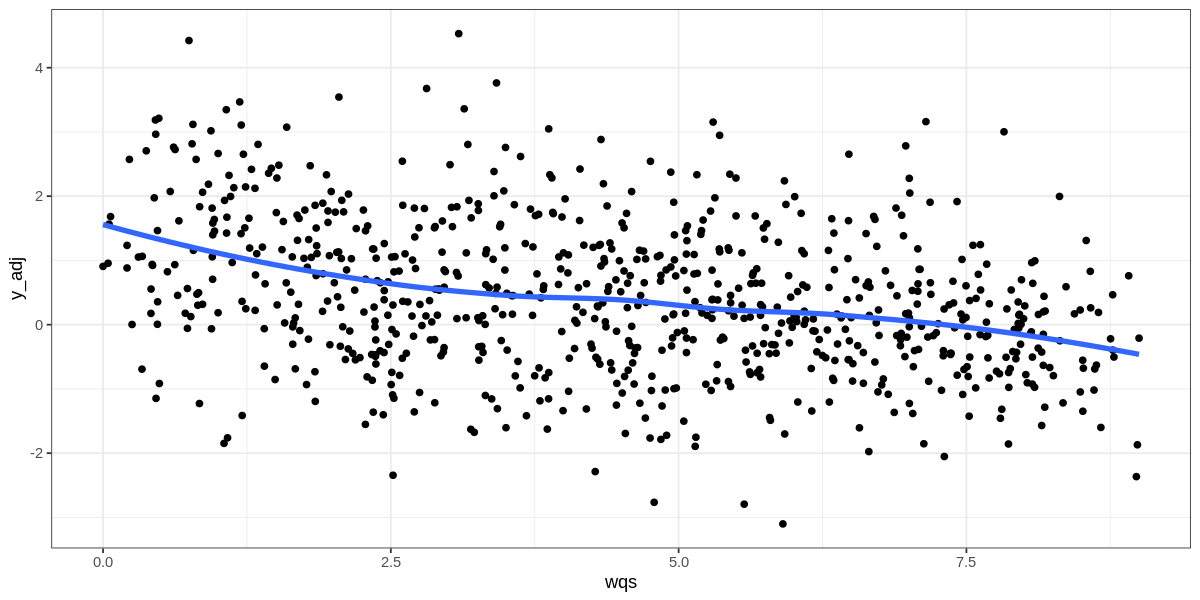

In [ ]:
options(repr.plot.width=10, repr.plot.height=5) # definimos el tamaño del gráfico en colab
gwqs_scatterplot(mod_wqs)

*   **Pregunta 6:** <font color='green'> **¿El modelo tiene en consideración posibles interacciones?** </font>

* **Bayesian Kernel Machine Regression (BKMR)**  

Es un método diseñado para abordar de una manera flexible y no-paramétrica, varios objetivos como; **1. Detección y estimación del efecto general de la mezcla** ; **2. Identificación del contaminante o grupo de contaminantes responsables de los efectos observados de la mezcla** ; **3. Visualización de la función exposición-respuesta** ; **4. Detección de interacciones entre contaminantes individuales**.







In [103]:
expo.list

[1] "hs_dde_cadj_Log2"      "hs_ddt_cadj_Log2"      "hs_hcb_cadj_Log2"     
[4] "hs_pcb118_cadj_Log2"   "hs_pcb138_cadj_Log2"   "hs_pcb153_cadj_Log2"  
[7] "hs_pcb170_cadj_Log2"   "hs_pcb180_cadj_Log2"   "hs_sumPCBs5_cadj_Log2"

In [104]:
# Definimos un dataframe nuevo utilizando los datos del objeto data, anteriormente utilizado en los análisis
X = data.frame(cohort2=as.numeric(data$h_cohort==2), cohort3=as.numeric(data$h_cohort==3),cohort4=as.numeric(data$h_cohort==4),
               cohort5=as.numeric(data$h_cohort==5), cohort6=as.numeric(data$h_cohort==6), female=as.numeric(data$e3_sex_None=="female"),
               year2004=as.numeric(data$e3_yearbir_None==2004), year2005=as.numeric(data$e3_yearbir_None==2005),
               year2006=as.numeric(data$e3_yearbir_None==2006), year2007=as.numeric(data$e3_yearbir_None==2007),
               year2008=as.numeric(data$e3_yearbir_None==2008), year2009=as.numeric(data$e3_yearbir_None==2009))

In [ ]:
# Tarda aproximadamente 50 minutos
set.seed(111)
fitkm <- kmbayes(y = data$hs_zbmi_who, Z = data[,expo.list], X = X,
                 iter = 10000, verbose = FALSE, varsel = TRUE)

Iteration: 1000 (10% completed; 7.6728 mins elapsed)

Iteration: 2000 (20% completed; 15.34793 mins elapsed)

Iteration: 3000 (30% completed; 26.19851 mins elapsed)

Iteration: 4000 (40% completed; 37.67395 mins elapsed)

Iteration: 5000 (50% completed; 45.84068 mins elapsed)

Iteration: 6000 (60% completed; 54.64973 mins elapsed)

Iteration: 7000 (70% completed; 1.05204 hours elapsed)

Iteration: 8000 (80% completed; 1.20467 hours elapsed)

Iteration: 9000 (90% completed; 1.34413 hours elapsed)

Iteration: 10000 (100% completed; 1.46546 hours elapsed)



In [105]:
# Objeto que contiene
fitkm

ERROR: ignored

Al utilizar varias iteraciones, es importante evaluar la convergencia de los parámetros. Observando los gráficos de convergiancia podemos verificar esto (esperamos un comportamiento aleatorio alrededor de la línea recta). Lo que generalmente observamos es una fase inicial de "burning", que deberíamos eliminar del análisis.

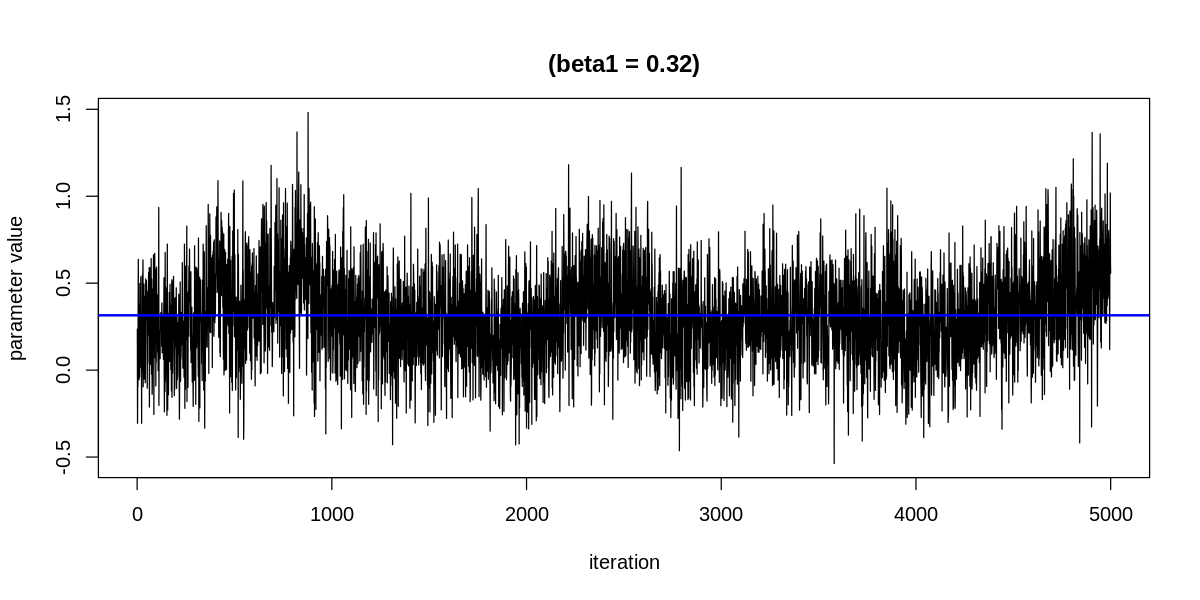

In [ ]:
bkmr::TracePlot(fit = fitkm, par = "beta")

Adicionalmente podemos mirar la probabilidad de inclusion posterior usando `bkmr::ExtractPIPs`

In [ ]:
bkmr::ExtractPIPs(fitkm)

variable,PIP
<chr>,<dbl>
hs_dde_cadj_Log2,0.7776
hs_ddt_cadj_Log2,0.6440
hs_hcb_cadj_Log2,1.0000
hs_pcb118_cadj_Log2,0.4892
hs_pcb138_cadj_Log2,0.3814
hs_pcb153_cadj_Log2,0.3560
hs_pcb170_cadj_Log2,1.0000
hs_pcb180_cadj_Log2,0.2106
hs_sumPCBs5_cadj_Log2,0.2820


Para obtener  la función exposición-respuesta para cada predictor/exposición utilizamos `bkmr::PredictorResponseUnivar`

In [ ]:
pred.resp.univar <- bkmr::PredictorResponseUnivar(fit = fitkm)

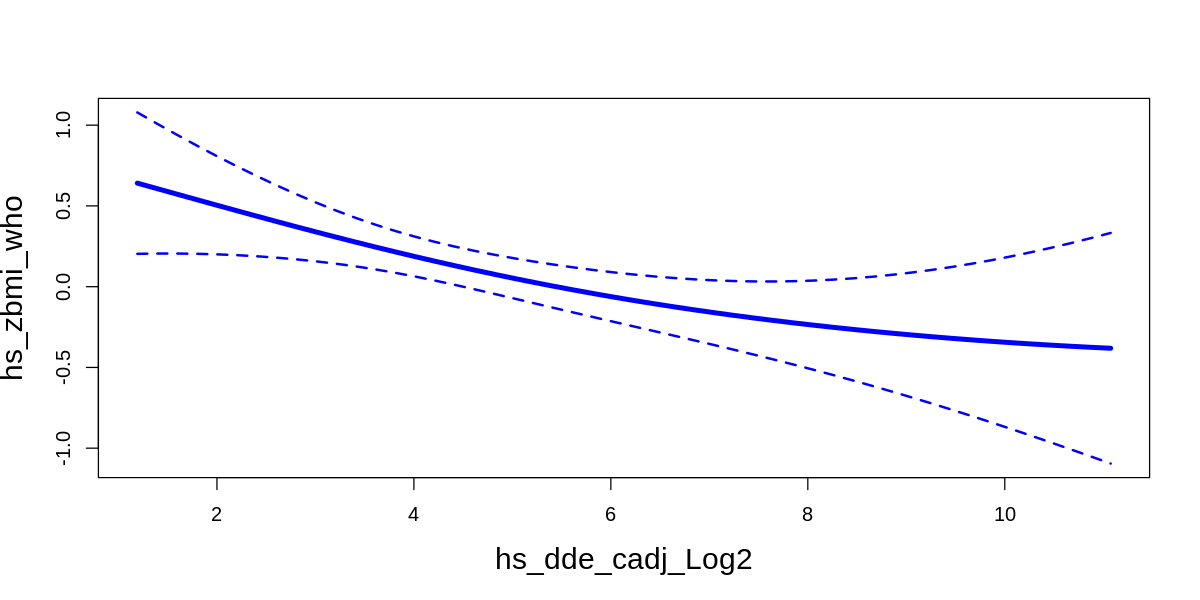

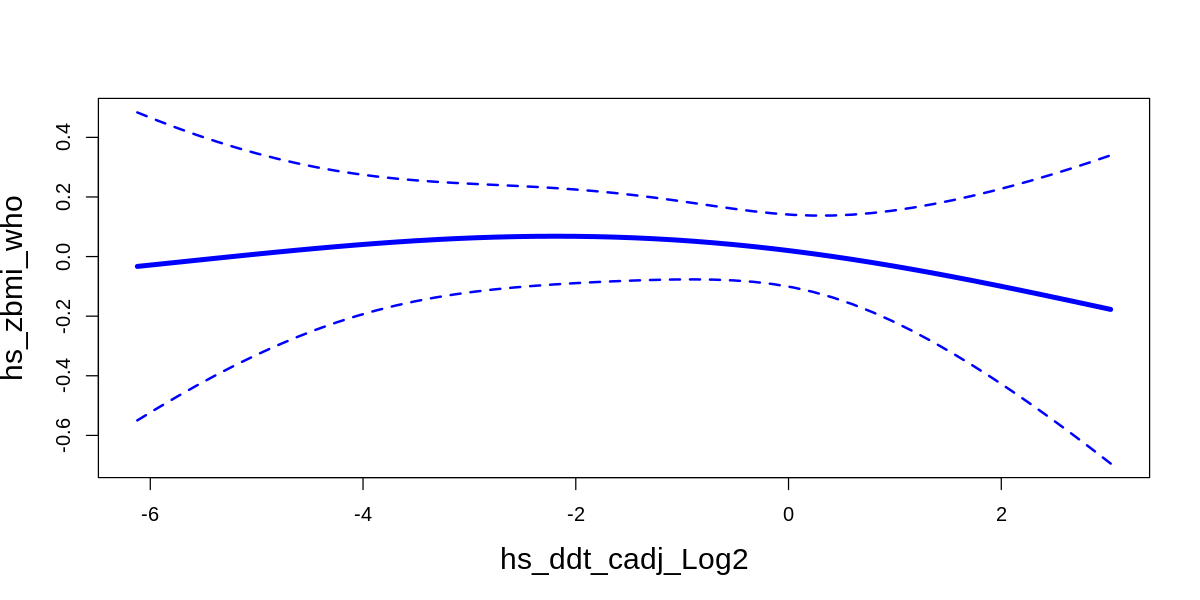

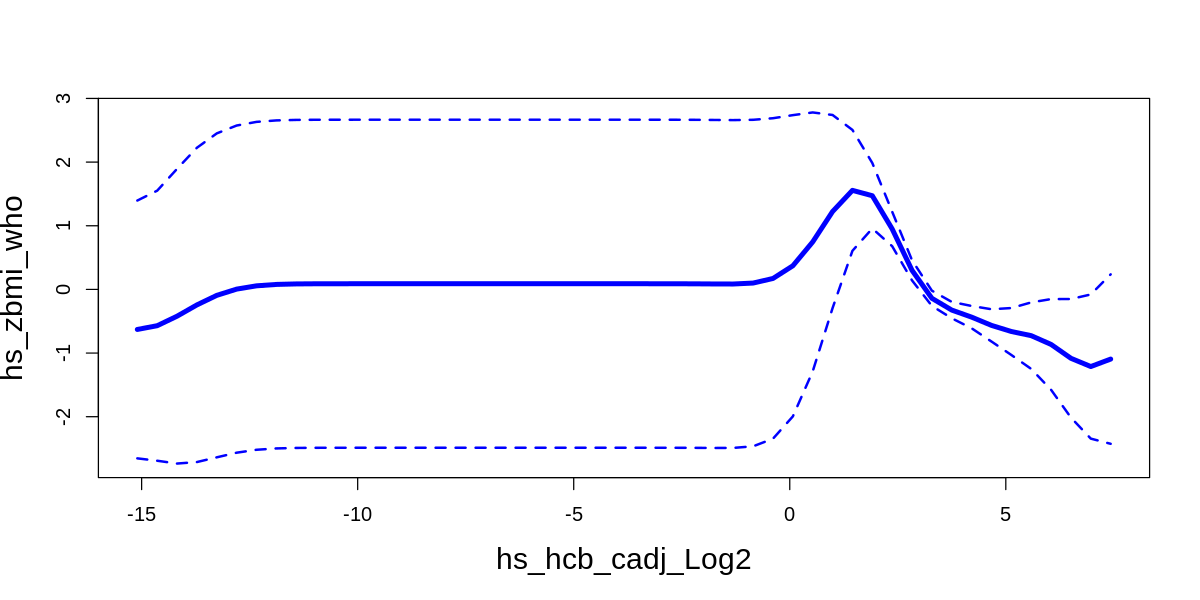

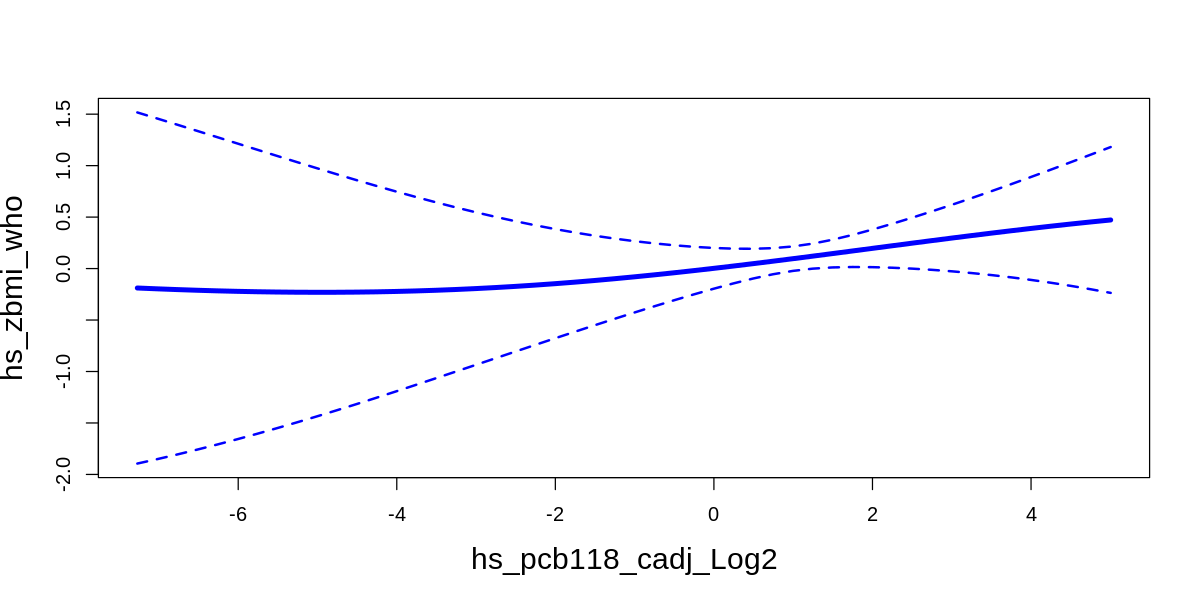

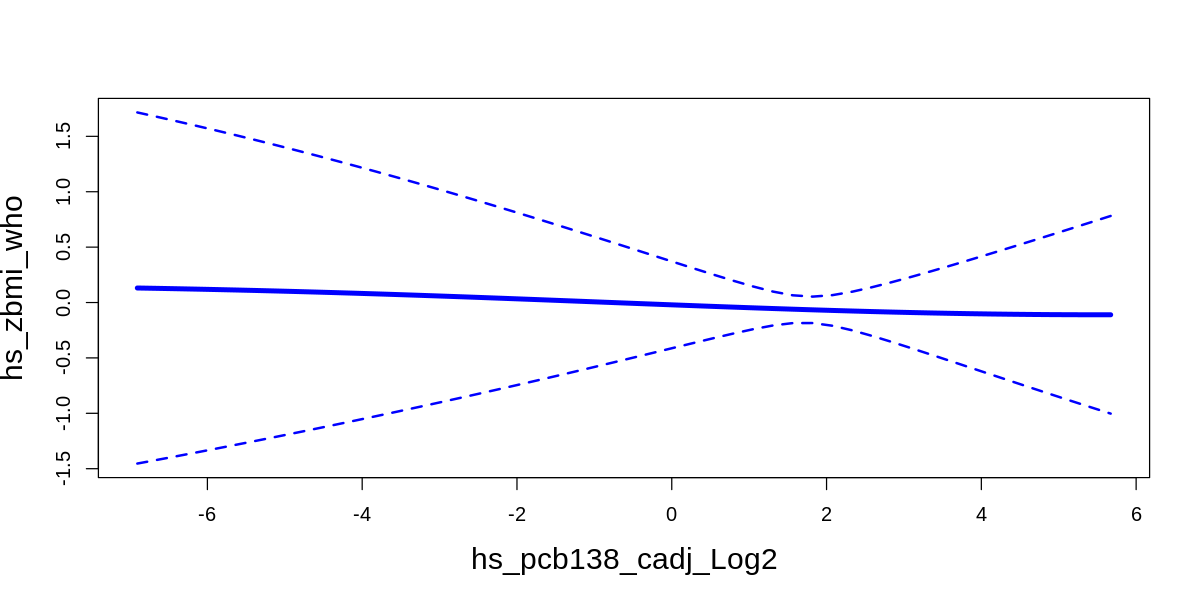

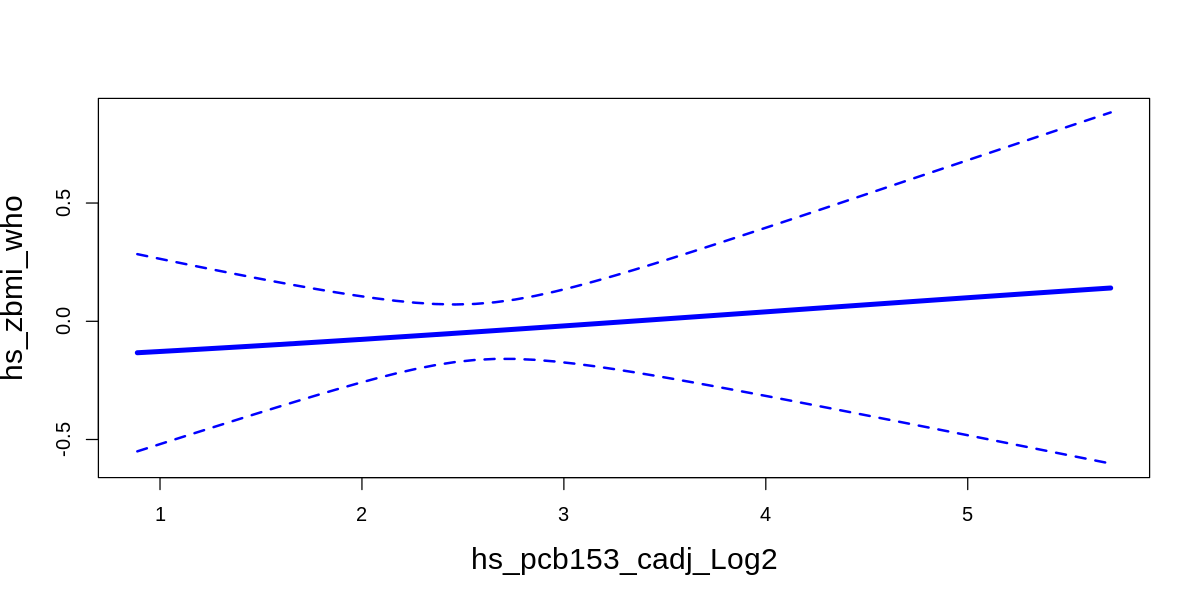

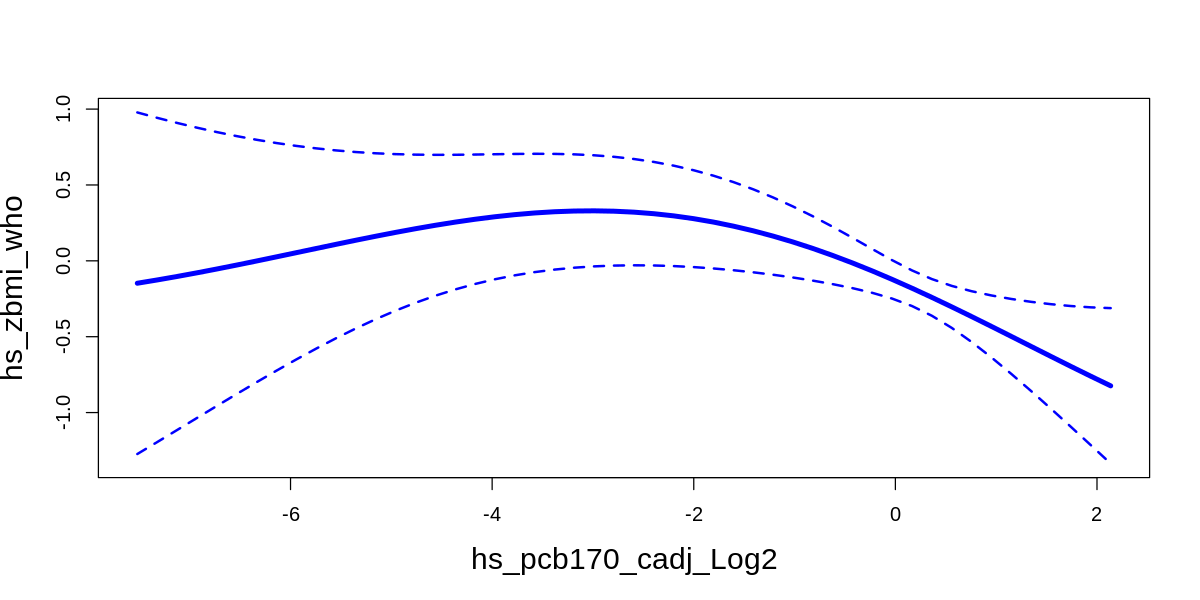

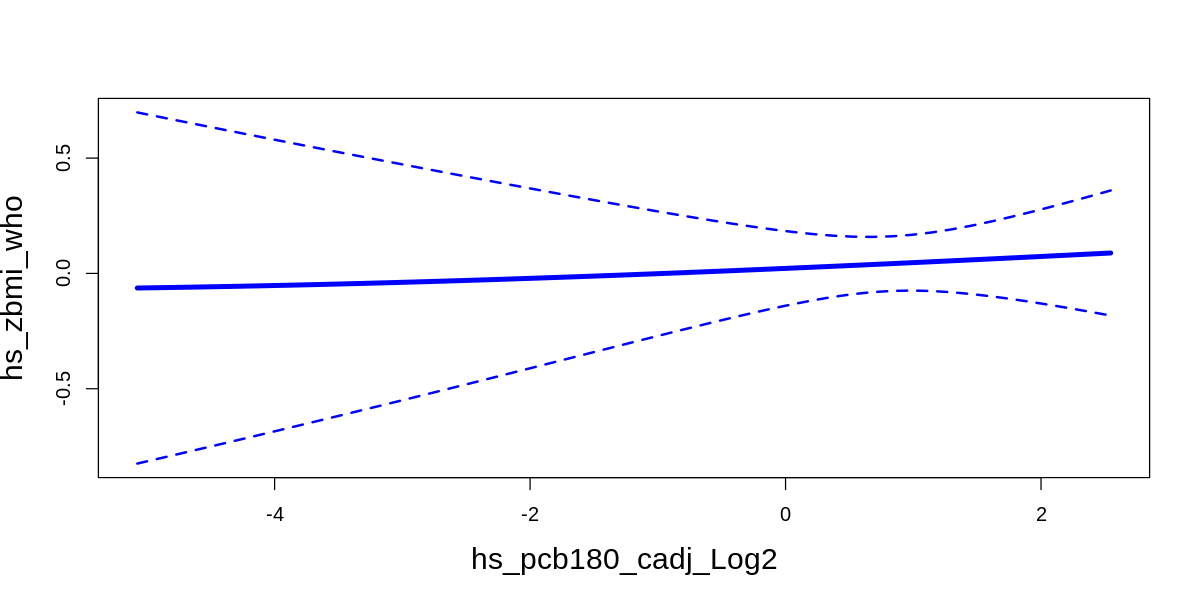

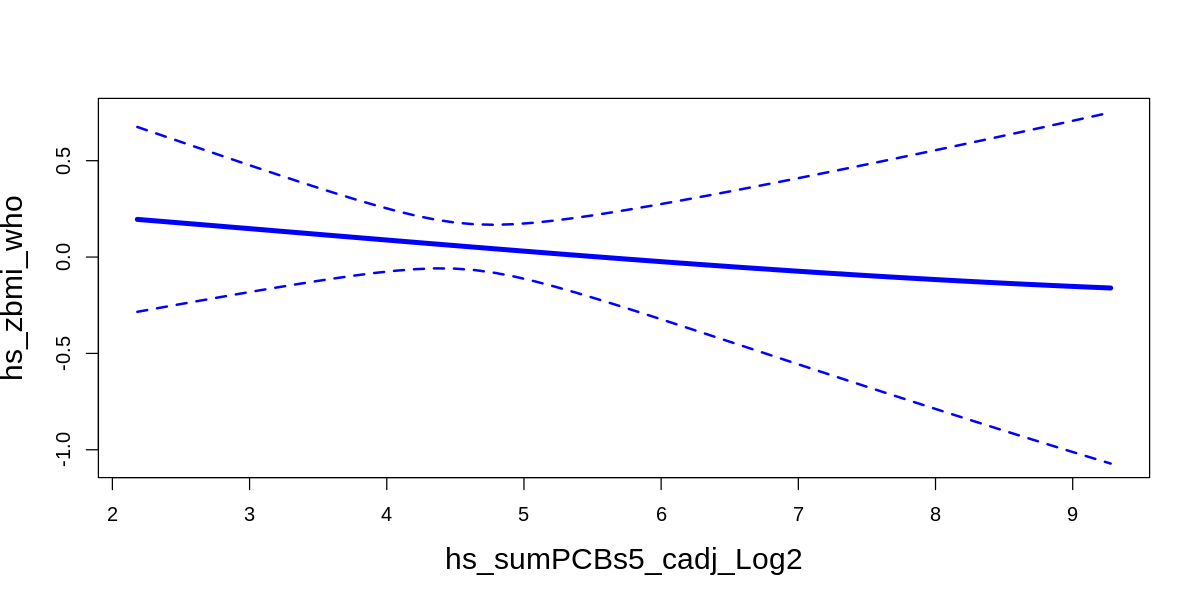

In [ ]:
for (i in 1:length(expo.list)) {
  z <- pred.resp.univar$z[pred.resp.univar$variable==expo.list[i]]
  est <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]
  lower <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]-1.96*pred.resp.univar$se[pred.resp.univar$variable==expo.list[i]]
  upper <- pred.resp.univar$est[pred.resp.univar$variable==expo.list[i]]+1.96*pred.resp.univar$se[pred.resp.univar$variable==expo.list[i]]
  plot(z,est,type="l", col="blue",lwd=4,
     xlab=expo.list[i],ylab="hs_zbmi_who", ylim=c(min(lower),max(upper)),cex.lab=1.5)
  lines(z,lower,lty=2, col="blue",lwd=2)
  lines(z,upper,lty=2, col="blue",lwd=2)
}

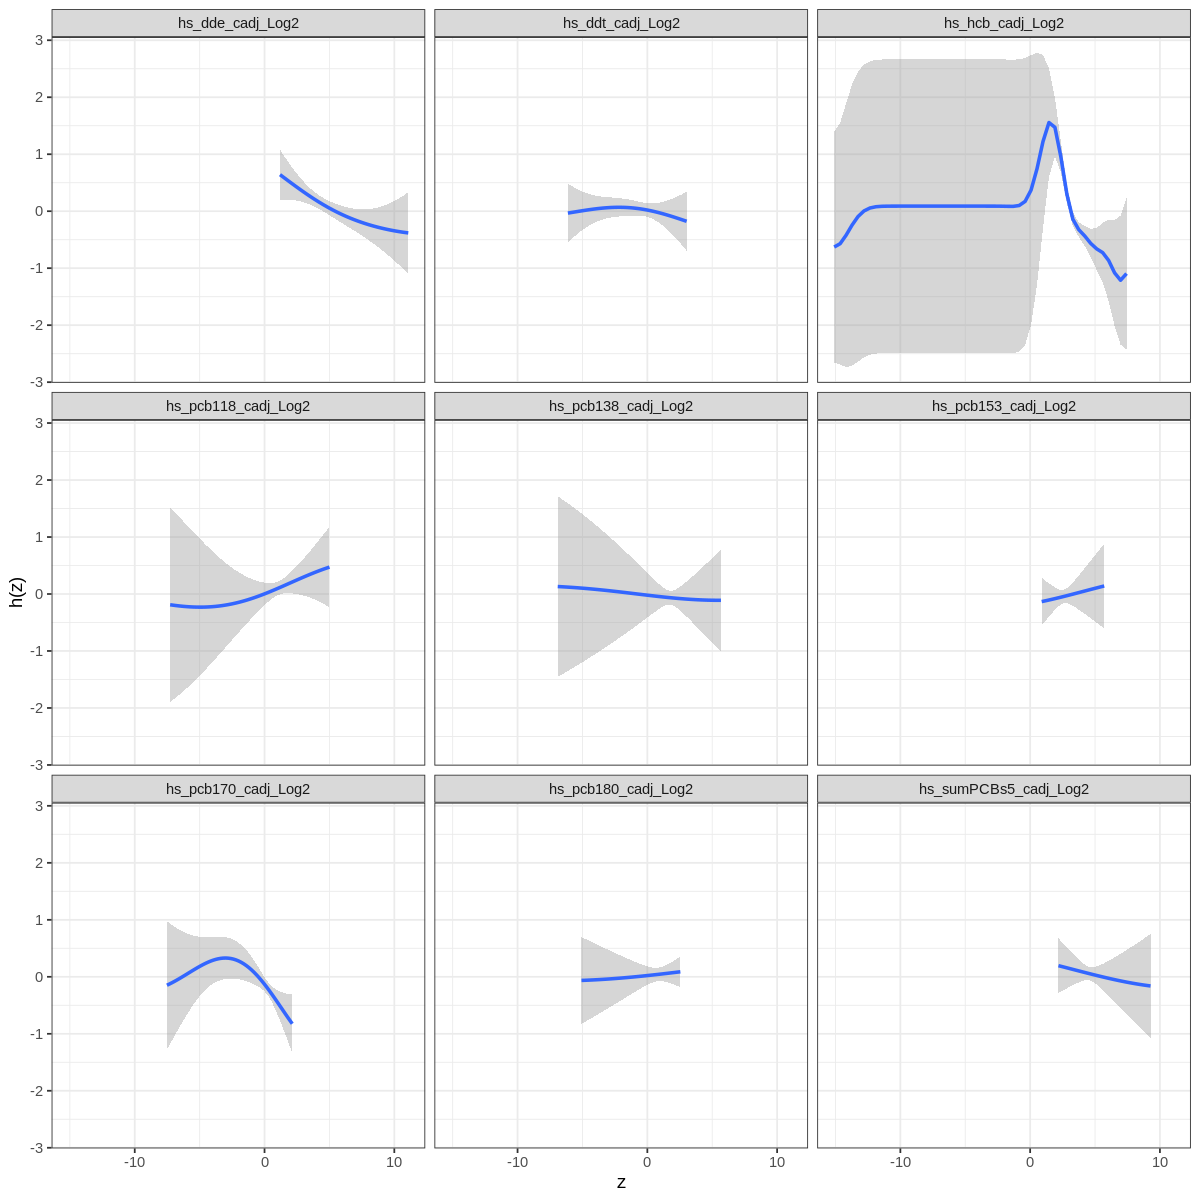

In [ ]:
# Tambien podemos usar ggplot para mirar los graficos
options(repr.plot.width = 10, repr.plot.height = 10) # definimos el tamaño del gráfico en colab
ggplot(pred.resp.univar, aes(z, est, ymin = est - 1.96*se,
                             ymax = est + 1.96*se)) +
  geom_smooth(stat = "identity") + ylab("h(z)") +
  facet_wrap(~ variable) +
  theme_bw()

Adicionalmente podemos obtener el efecto conjunto de la mezcla utilizando la fúncion `bkmr::OverallRiskSummaries`

In [ ]:
risks.overall <- bkmr::OverallRiskSummaries(fit=fitkm, qs=seq(0.25, 0.75, by=0.05),
                                      q.fixed = 0.5, method = "approx")

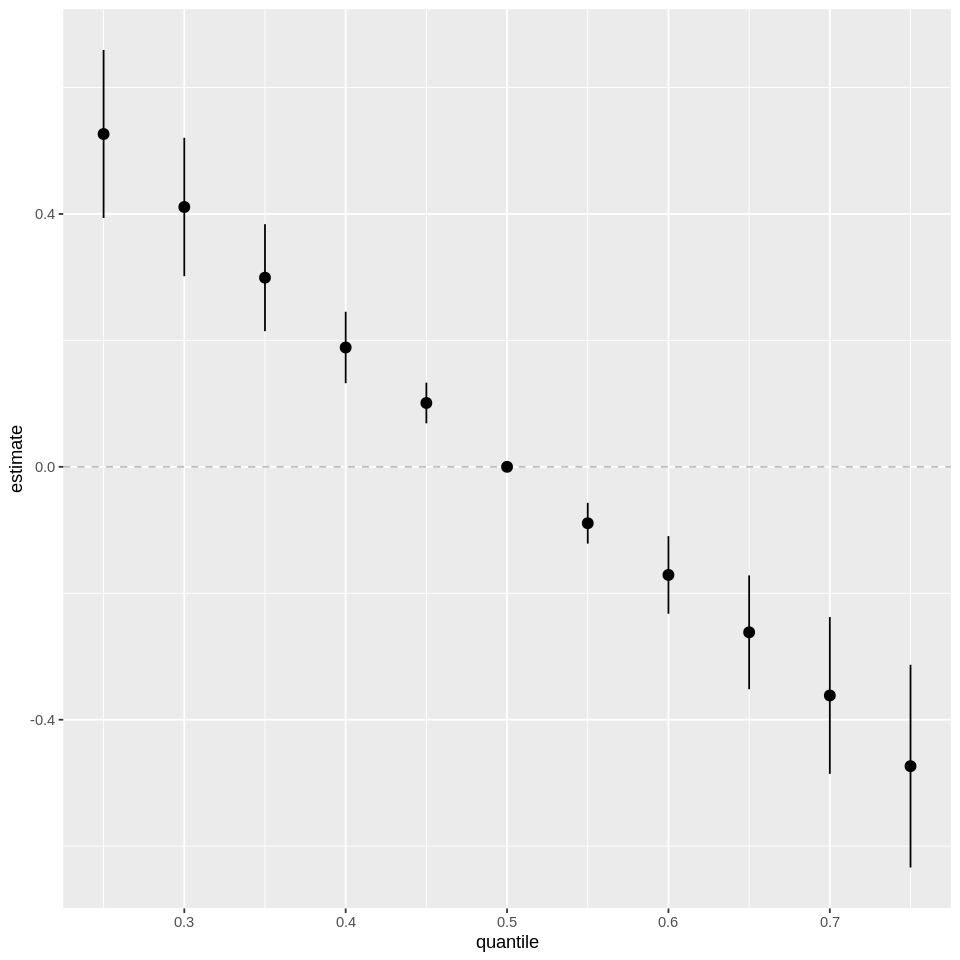

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) # definimos el tamaño del gráfico en colab
ggplot(risks.overall, aes(quantile, est, ymin = est - 1.96*sd,
                          ymax = est + 1.96*sd)) +
  geom_hline(yintercept=00, linetype="dashed", color="gray") +
  geom_pointrange() + scale_y_continuous(name="estimate")

Si queremos conocer la contribución de un predictor individual en el desenlace de salud analizado utilizamos la función `bkmr::SingVarRiskSummaries`.


In [ ]:
risks.singvar <- SingVarRiskSummaries(fit= fitkm, qs.diff = c(0.25, 0.75),
                                      q.fixed = c(0.25, 0.50, 0.75),
                                      method = "approx")

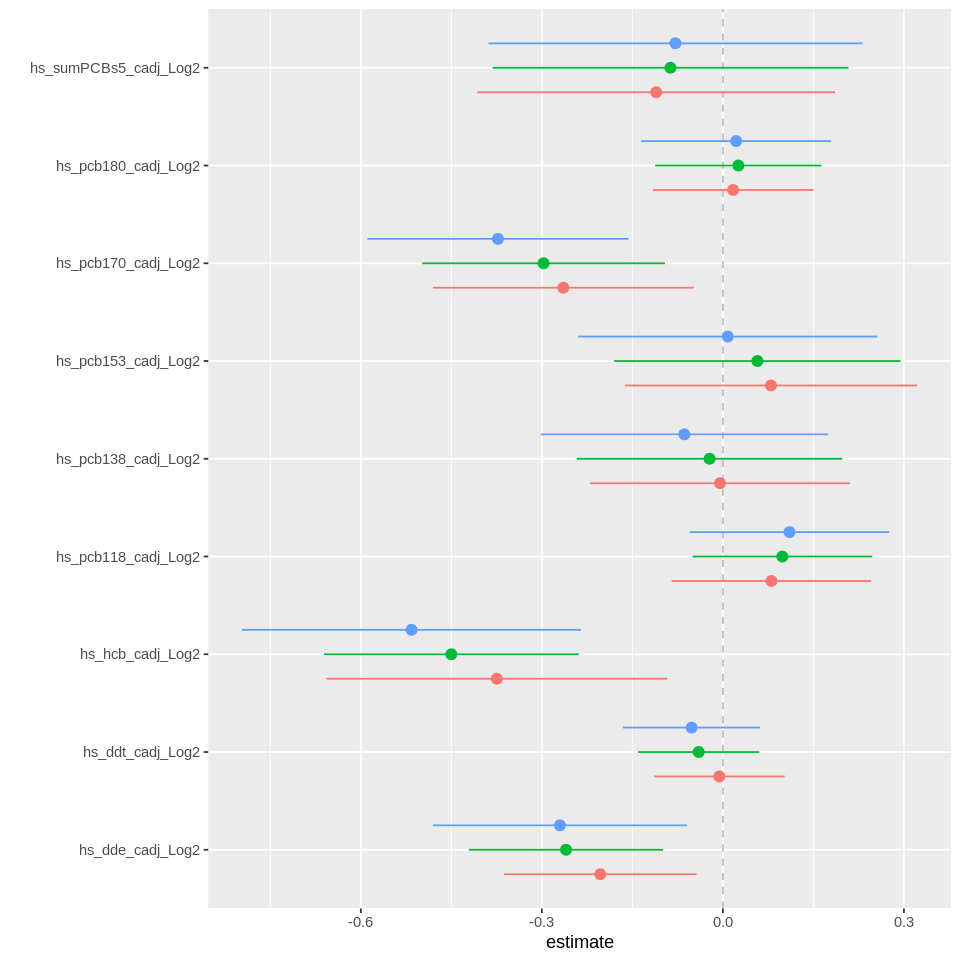

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8) # definimos el tamaño del gráfico en colab
ggplot(risks.singvar, aes(variable, est, ymin = est - 1.96*sd,
                          ymax = est + 1.96*sd, col = q.fixed)) +
       geom_hline(aes(yintercept=0), linetype="dashed", color="gray") +
       geom_pointrange(position = position_dodge(width = 0.75)) +
       coord_flip() + theme(legend.position="none")+scale_x_discrete(name="") +
       scale_y_continuous(name="estimate")